# Nonlinearity

▶ **Complex Systems Modeling of Human-Environment Interactions**<br>>> Open the latest version on the [*web*](https://wbarfuss.github.io/csm-of-hei/02.01-Nonlinearity.html), [*Github*](https://github.com/wbarfuss/csm-of-hei/blob/main/02.01-Nonlinearity.ipynb), or in [*GoogleColab*](https://colab.research.google.com/github/wbarfuss/csm-of-hei/blob/main/02.01-Nonlinearity.ipynb) <<<br>
[Wolfram Barfuss](https://wbarfuss.github.io) | [University of Bonn](https://www.uni-bonn.de) | 2025/2026 

In [ ]:
#| echo: false
from IPython.display import IFrame
def iframe(url, width="100%", height=450, extras=None):
    return IFrame(url, width, height, extras)

## Motivation

### The issue of climate change

Read the following summary, adapted from the Intergovernmental Panel on Climate Change (IPCC) Third Assessment Report's Summary for Policymakers.

![The issue of climate change](images/02.01-StermanSweeney2007-TheIssueOfClimateChange.dio.png)

Now consider the following questions:

![A scenario of climate change](images/02.01-StermanSweeney2007-AScenarioOfClimateChange.dio.png)

**Typical responses**. 

This experiment was conducted with MIT graduate students, a group of highly educated adults [@StermanSweeney2007]. Yet, they showed a widespread misunderstanding of fundamental stock and flow relationships. Most subjects believed that atmospheric greenhouse gas (GHG) can be stabilized while emissions into the atmosphere continuously exceed the removal of GHGs from it.

![Typical Responses](images/02.01-StermanSweeney2007-TypicalResponses.dio.png)

These beliefs support wait-and-see policies and neglecting the issue climate change as a top priority for the policy agenda.


### Carbon bathtub

Knowledge of climatology or calculus is not needed to respond correctly. Think of it like a bathtub: the water level represents the amount of greenhouse gases (GHGs) in the atmosphere. The water flowing into the tub is like the rate of GHG emissions, and the water flowing out is like the rate of GHG removal. If more water is flowing in than out, the water level rises. To keep the water level stable, the inflow and outflow need to be equal. This is similar to stabilizing GHG concentrations - emissions must equal removals. The balance between inflows and outflows determines how GHGs accumulate, not just the level of inflows.

![Carbon Bathtub](images/02.01-ClimateBathtub.dio.png)

### Learning goals

After this chapter, students will be able to:

* Define and describe the **components of a dynamic system**.
* **Represent** dynamic system models in visual and mathematical form.
* Explain the concepts of **feedback loops**  and **delays**.
* Explain two kinds of **non-linearity** and how they are related.
* **Implement** dynamic system models and **visualize model outputs** using Python, to interpret model results.
* **Analyze** the **stability** of equilibrium points in dynamic systems using linear stability analysis.

After motivating this chapter, we make ourselves ready for some computations by importing some Python libraries and setting up the plotting style.

In [ ]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from ipywidgets import interact

import matplotlib.style as style; style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (7.8, 2.5); plt.rcParams['figure.dpi'] = 300
color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]  # get the first color of the default color cycle
plt.rcParams['axes.facecolor'] = 'white'; plt.rcParams['grid.color'] = 'gray'; plt.rcParams['grid.linewidth'] = 0.25; 

## Dynamic systems

>  A *dynamic system*[^dynsys] is a system whose state is uniquely specified by a set of variables and whose behavior is described by predefined rules.

[^dynsys]: In mathematics, the term "dynamical system" is more commonly used. But there is also the related field of "system dynamics", with its own scientific community. I don't want to get into the details of the differences between these two fields. For the purpose of this course, we will use the term "dynamic system" to refer to the overarching ideas.

You can think of the **state** of the system as a collection of **stocks** (also known as *state variables*), 
and the **rules** as the **flows** that change the stocks over time.
At the system boundaries, you can imagine **sources** and **sinks**, which represent in- and out-flows to the system we are currently looking at. 

**For example**, in the case of the carbon bathtub, the state of the system is the amount of carbon in the atmosphere. The rules are that emissions increase and net removals decrease the amount of carbon in the atmosphere. The source is the origin of emissions, and the sink where the net removals go (i.e., mostly ocean and biosphere). Both, source and sink, are not explicitly represented in this model - but could be in another model.

### Pictorial representation
Graphically, we can compose (often called) stock-and-flow or causal (loop) diagrams via the following building blocks.

![Graphical elements of a dynamic system](images/02.01-DynamicSystem-Elements.dio.png)

For instance, the carbon bathtub could resemble this:

![Graphical elements of a dynamic system](images/02.01-DynamicSystem-ClimateBathtub.dio.png)

Such pictorial models are a powerful tool to develop a dynamic systems model and communicate its structure. However, they are limited regarding specifying model details and analysis. For this, a mathematical representation is essential.

### Mathematical representation

Mathematically, we use **variables** (such as $x$, $y$, and any other letter) as a **placeholder** for the value of a stock. 
We indicate the value at a **specific time** $t$ by an index (such as $x_t$, $y_t$, etc.), assuming that time advances in discrete steps, i.e., $t \in \mathbb{Z}$.
To describe the **change of stocks**, we formulate an equation (with $+$'s and $-$'s for positive and negative changes).
In its most general form, it looks like,

$$x_{t+1} = F(x_{t}).$$

This means the value of the stock $x$ at time $t+1$ equals the value of the function $F$, which depends on the value of stock at time $t$.
Note that another common name for dynamic systems in discrete time is *maps*.

**For example**, the carbon bathtub equations look like,

$$ x_{t+1} = x_{t} + e_{t} - o_{t}, $$

where $x$ denotes the atmospheric carbon stock, and $e_t \geq 0$ and $o_t \geq 0$ the amount of emissions and outflow at time $t$.

This equation shows that the stock at time $t+1$ equals the stock at time $x_t$ plus the inflow of emissions at time $e_t$ minus the outflow at time $o_t$. Thus, what ultimately determines the stock at time $t+1$ is the difference between the emissions and the outflow at time $t$. Let $n_t = e_t - o_t$ be the net flow. Then, we can rewrite the equation as

$$ x_{t+1} = x_t + n_t.$$

Note that $n_t$ can be positive or negative, depending on the emissions and the outflows.

Sometimes, it can be handy to represent the dynamic system in its **difference form**, directly indicating the **change of stocks**,

$$
\Delta x = x_{t+1} - x_{t} = F(x_{t}) - x_{t}.
$$

In analogy to the more common *differential equations* (which work with *continuous time*), we call this form **difference equations**.

**For example**, the carbon bathtub difference equations look like,

$$ \Delta x = e_{t} - o_{t}.$$

#### DeepDive | Why discrete-time models

Most dynamical system models consider the continous-time case; but we will focus on discrete time.

Discrete-time models are easy to understand, develop and simulate. 

- Computer simulations require time-discretization anyway.
- Experimental data often already discret.
- They can represent abrupt changes. 
- They are more expressive using fewer variables than their continuous-time counterparts.

Discrete-time models are a cornerstone in mathematical modeling due to their simplicity and adaptability. They align naturally with computer simulations, as digital systems process time in discrete intervals. This compatibility makes them essential for precise computational analysis.
Additionally, experimental data is often recorded at specific intervals, such as daily or monthly, fitting seamlessly with discrete-time models without requiring transformation processes needed for continuous-time models. These models also excel at representing abrupt changes found in real-world phenomena, such as population dynamics or financial markets, capturing these shifts more directly than continuous models.
Furthermore, discrete-time models often require fewer variables, enhancing both simplicity and interpretability. This efficiency allows researchers to focus on critical system aspects, making these models powerful tools for theoretical and practical applications alike.
In essence, the strengths of discrete-time models lie in their alignment with digital computation, natural fit with discrete data, ability to capture sudden changes, and efficient expressiveness, making them indispensable for scientists and engineers.

### Computational representation

There are, in fact, **many ways** to translate the pictorial and mathematical models into a computer model.
We start by defining the **function**, $F(x_t)$, from above but give it a more **descriptive name**.

In [ ]:
def update_stock(stock, inflow, outflow):
    new_stock = stock + inflow - outflow
    return new_stock

Now, we are ready to perform our **first model simulation**.

**Conceptually**, we need to define the **initial value** of the stock.
Let's assume we start at 280 parts per million (ppm).

In [ ]:
stock = 280

**Technically**, we must define a container to store the simulation output.
We create a Python list for this purpose and store the stock's initial value inside.

In [ ]:
time_series = [stock]
time_series

[280]

**Conceptually**, before we can start the simulation, we must decide
**how many time steps** it should run, and 
on the values of **inflow and outflow**.
Let's simulate 150 steps, denoting yearly updates from 1850 to 2000, and assume a **constant flow** with an inflow of 75.6 ppm and an outflow of 75 ppm. 

**Technically**, we loop over the `range` from 1851 to 2001, calling the `update_stock` function with the flow parameter values and appending the new `stock` value to the `time_series` list. 

In [ ]:
for t in range(1851, 2001): 
    stock = update_stock(stock, 75.6, 75); 
    time_series.append(stock)

Finally, we can graphically investigate the output time series of our model simulation. 

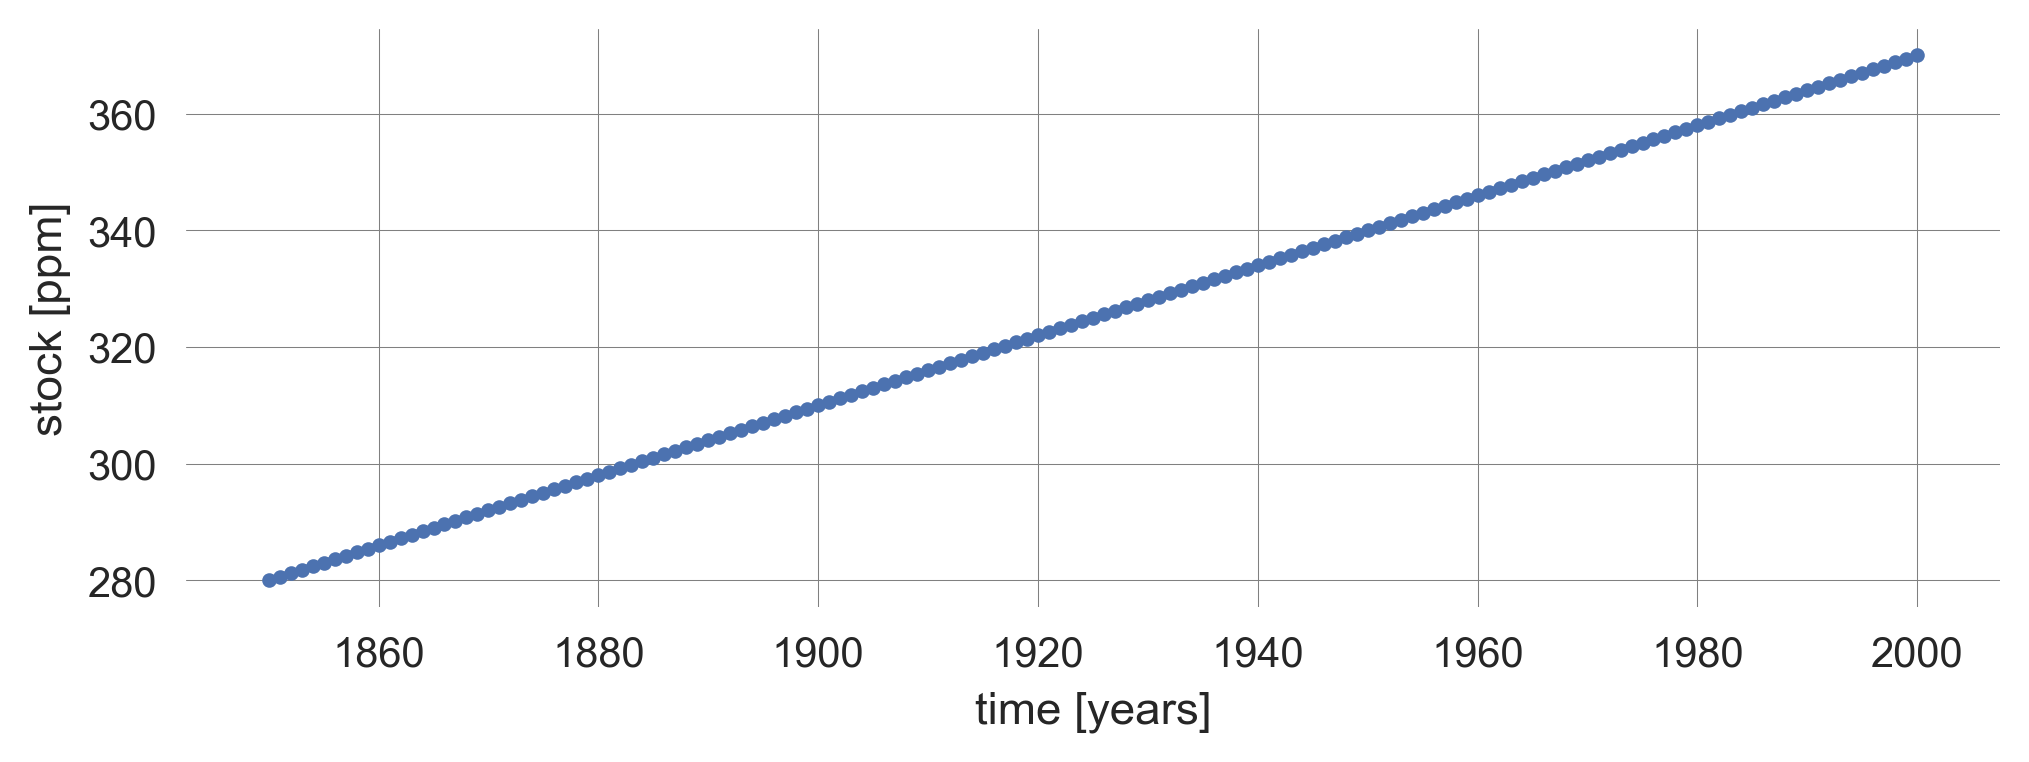

In [ ]:
#| label: fig-linear-growth
#| fig-cap: Linear growth
plt.plot(list(range(1850, 2001)), time_series, '.-'); 
plt.xlabel('time [years]'); plt.ylabel('stock [ppm]');

The above code cell plots the time_series data with dots at each data point and lines connecting them.

* `plt` is an alias for `matplotlib.pyplot`, a popular plotting library in Python.
* `plot` is a function that creates a 2D line plot.
* `list(range(1850, 2001))` represents the values to be plotted along the x-axis.
* `time_series` is the data being plotted. It is expected to be a sequence of values (e.g., a list or a NumPy array).
* `'.-'` is a format string that specifies the style of the plot:
    * `'.'` indicates that the data points should be marked with dots.
    * `'-'` indicates that the data points should be connected with lines.
* The second line equips the plot with an x- and a y-label.
    * The `;` at the end of each statement allows for multiple statements in one line.

We observe a rise in CO2 concentration from 280 ppm to 370 ppm, as in the observation data.

However, the shape of the curve is different. 
Here, we observe just a **linear trend**. The change of stock equals the net flow of inflows minus outflows. If they are constant, the stock evolution is linear.

Linear here means that the change in stock is proportional to the in and outflows. If they are constant, the rate of change is constant and the stock evolution is linear.


### A general modeling framework

The carbon bathtub example is perhaps the simplest dynamic model one can imagine. Still, it illustrates the importance of differentiating between a stock and a flow, which is changing that stock.

However, the real power of dynamic system models comes from their **generality** and the possibility to include **feedbacks** in the change of stocks.



Dynamic systems are a very **general modeling framework**. They can model many more phenomena than the evolution of atmospheric greenhouse gas concentrations, from classic examples, such as the *bouncing of a ball*, the *swing of a pendulum*, and the *motions of celestial bodies*, to more advanced dynamics, such as the *evolution of populations*, the *weather and climate*, *neural networks* in the brain, or the *behavior of agents*.

**For example**, the `update_stock` function we defined above is entirely **agnostic** regarding which kind of stock it models. The Python function does not refer to the stock of atmospheric greenhouse gas concentration. It can **model any system** with one stock where the stock change is independent of the current level of the stock. Or, in other words, systems **without feedback**.


## Feedback

In dynamic systems, feedback means that **stock changes depend on current stock levels**.

### Positive feedback loops

Consider, for example, the following system, pictorially,

![Positive Feedback Loop](images/02.01-DynamicSystem-PositiveFeedback.dio.png)

or mathematically,

$$x_{t+1} = x_{t} + rx_{t} \quad \Leftrightarrow \quad \Delta x = rx$$

with $r > 0$.

**Guess what will happen**, given a positive initial stock value.

1) The stock will grow in a straight line.
2) The stock will grow faster, i.e., on an upward-bending curve.
3) The stock will grow slower, i.e., on a downward-bending curve.

We will find out. 

Let's first define our new `update_stock` function.

In [ ]:
def update_stock(stock, rate):
    new_stock = stock + rate*stock
    return new_stock

To run the model, i.e., to iterate the `update_stock` function, we define an `iterate_model` function. 

In [ ]:
def iterate_model(nr_timesteps, initial_value, update_func,
                  **update_params):
    stock = initial_value
    time_series = [stock]
    for t in range(nr_timesteps):
        stock = update_func(stock, **update_params)
        time_series.append(stock)
    return np.array(time_series)

This function takes, the number of time steps, the initial stock value as input arguments. Furthermore, it takes an `update_func` function and flexible `**update_params` as arguments, which allows us to use different stock update functions. It returns a `numpy` array of stock values over time.

The stock value starts at `initial_value`.
The list `time_series` is initialized with the starting stock value. This will store the stock value at each timestep.

Then, a loop runs `nr_timesteps` times. The `update_func` function is called in each iteration with the current stock value and the `update_parameters`. The result is assigned to `stock`, updating its value.
The new `stock` value is appended to the `time_series` list, which tracks the stock's value at each timestep.


For convenience, we will also define a `plot_stock_evolution` function, plotting the stock evolution.

In [ ]:
def plot_stock_evolution(nr_timesteps, initial_value, update_func,
                         **update_parameters):
    time_series = iterate_model(nr_timesteps, initial_value, 
                                update_func, **update_parameters)
    plt.plot(time_series, '.-', label=str(update_parameters)[1:-1]);
    plt.xlabel("Time steps"); plt.ylabel("Stock value");
    return time_series

The `plot_stock_evolution` function calls the `iterate_model` function with the given parameters and plots the `time_series` on the axis, with the format `'.-'` (dots connected by lines) and a legend label indicating the parameters used. The `str(update_parameters)[1:-1]` converts the `update_parameters` dictionary into a string and, with `[1:-1]`, removes the first and last characters (`{` and `}` in the case of a dictionary).

Finally, the function returns the `time_series` list, which contains the stock values at each timestep.

**For example**, let's consider the phenomenon of CO2 emissions. 

::: {.content-visible when-format="html"}

In [ ]:
#| echo: false
iframe("https://ourworldindata.org/explorers/co2?hideControls=true&Gas+or+Warming=CO%E2%82%82&Accounting=Territorial&Fuel+or+Land+Use+Change=All+fossil+emissions&Count=Per+country&country=CHN~USA~IND~GBR~OWID_WRL&tab=chart")

:::

Our stock will be the annual CO2 emissions. We assume that we start with 0.01 gigatons of CO2 emissions around 1750 and assume a constant growth rate of 3.3% per year. Where are we 250 years later?

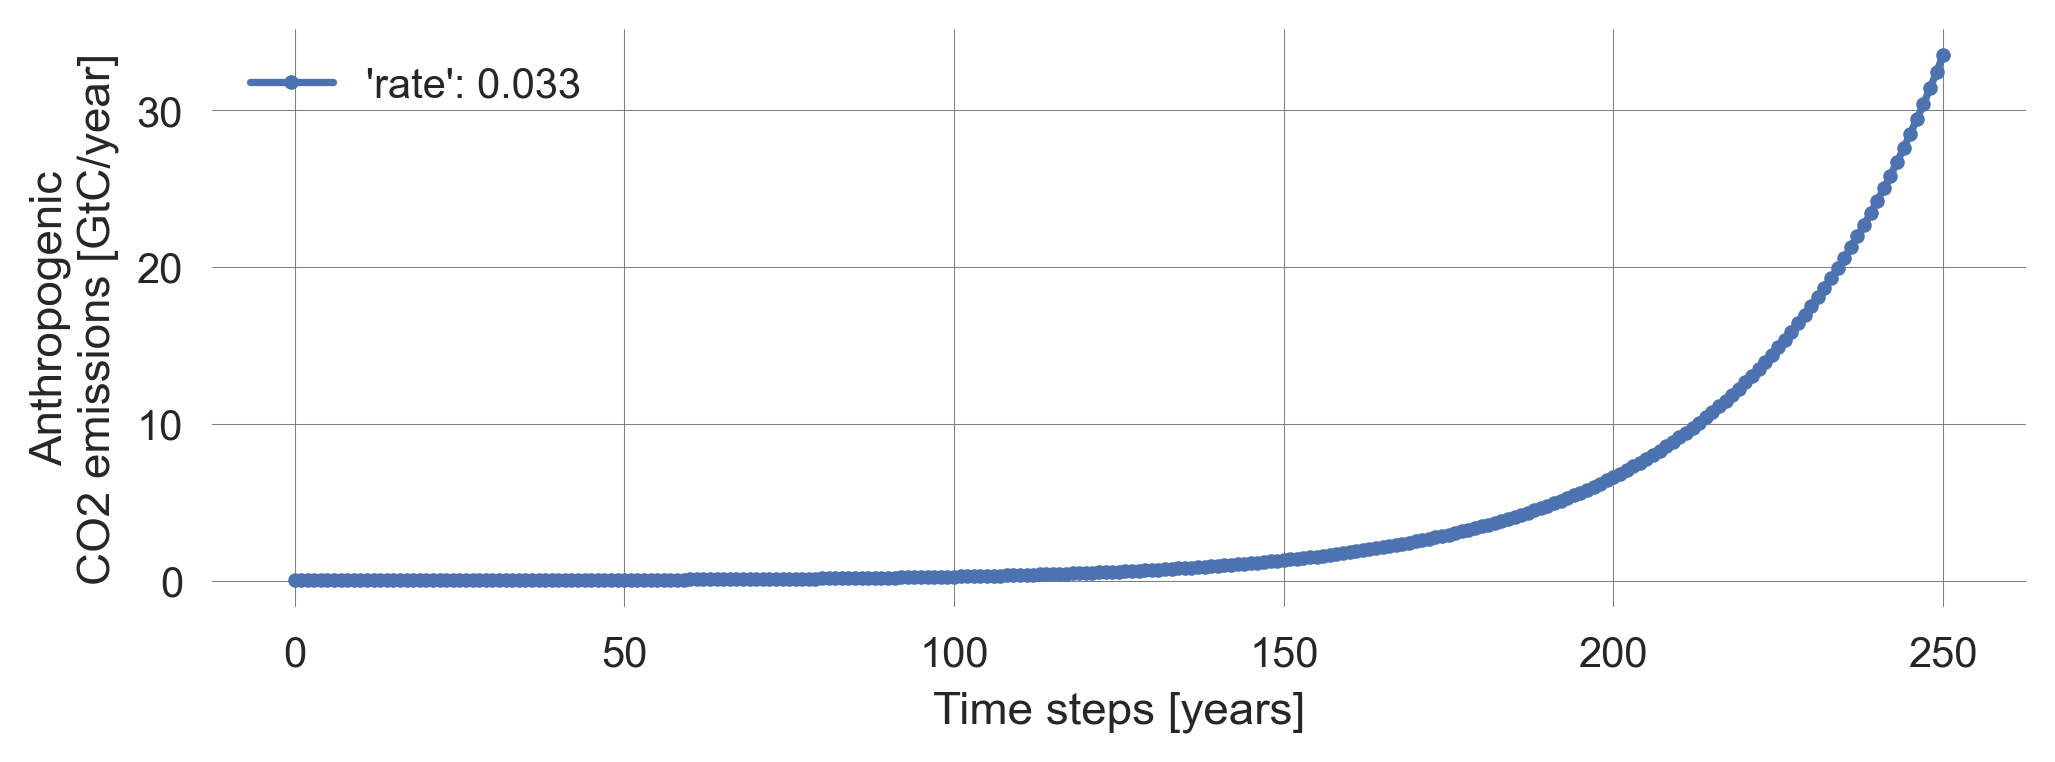

In [ ]:
#| fig-cap: Exponential growth
plot_stock_evolution(250, 0.01, update_func=update_stock, rate=0.033);
plt.xlabel("Time steps [years]"); plt.ylabel("Anthropogenic\nCO2 emissions [GtC/year]"); plt.legend();

We reach a **level** of annual CO2 emissions that resembles the empirical observation; additionally, the **trajectory** aligns more closely with the empirical data than the linear growth above (@fig-linear-growth).

With the generality of dynamic system models in mind, we can regard the simple positive feedback loop as the **meta-level systems structure of the great acceleration**. The great acceleration [@SteffenEtAl2015a] refers to the hockey-stick-like growth of many socio-economic and environmental indicators since the mid-20th century (@fig-great-acceleartion).

![The great acceleration](images/02.01-GreatAcceleration.png){#fig-great-acceleartion}

As these developments are not necessarily positive in a normative sense, positive feedback loops are better called **reinforcing feedback loops**.

The worth of a formal model lies in enabling us to conduct **"experiments" safely and at low cost**. By adjusting the input parameters, we see how the output shifts. Overall, our goal is to gain deeper insights into how the output depends on the inputs.

**For example**, how does the output change if we cut the **rate** of change **in half**? How does the output change if we **double** the rate? 

**What do you think?**

1) A halved rate leads to about a **quarter of the stock** at the end, and a doubled rate leads to about **four times the stock** at the end.
2) A halved rate leads to about a **16th of the stock** at the end, and a doubled rate leads to about **four times the stock** at the end.
3) A halved rate leads to about a **quarter of the stock** at the end, and a doubled rate leads to about **16 times of the stock** at the end.
4) A halved rate leads to about a **10th of the stock** at the end, and a doubled rate leads to about **10 times the stock** at the end.
5) A halved rate leads to about a **10th of the stock** at the end, and a doubled rate leads to about **100 times of the stock** at the end.
6) A halved rate leads to about a **100th of the stock** at the end, and a doubled rate leads to about **10 times of the stock** at the end.

Let's find out.

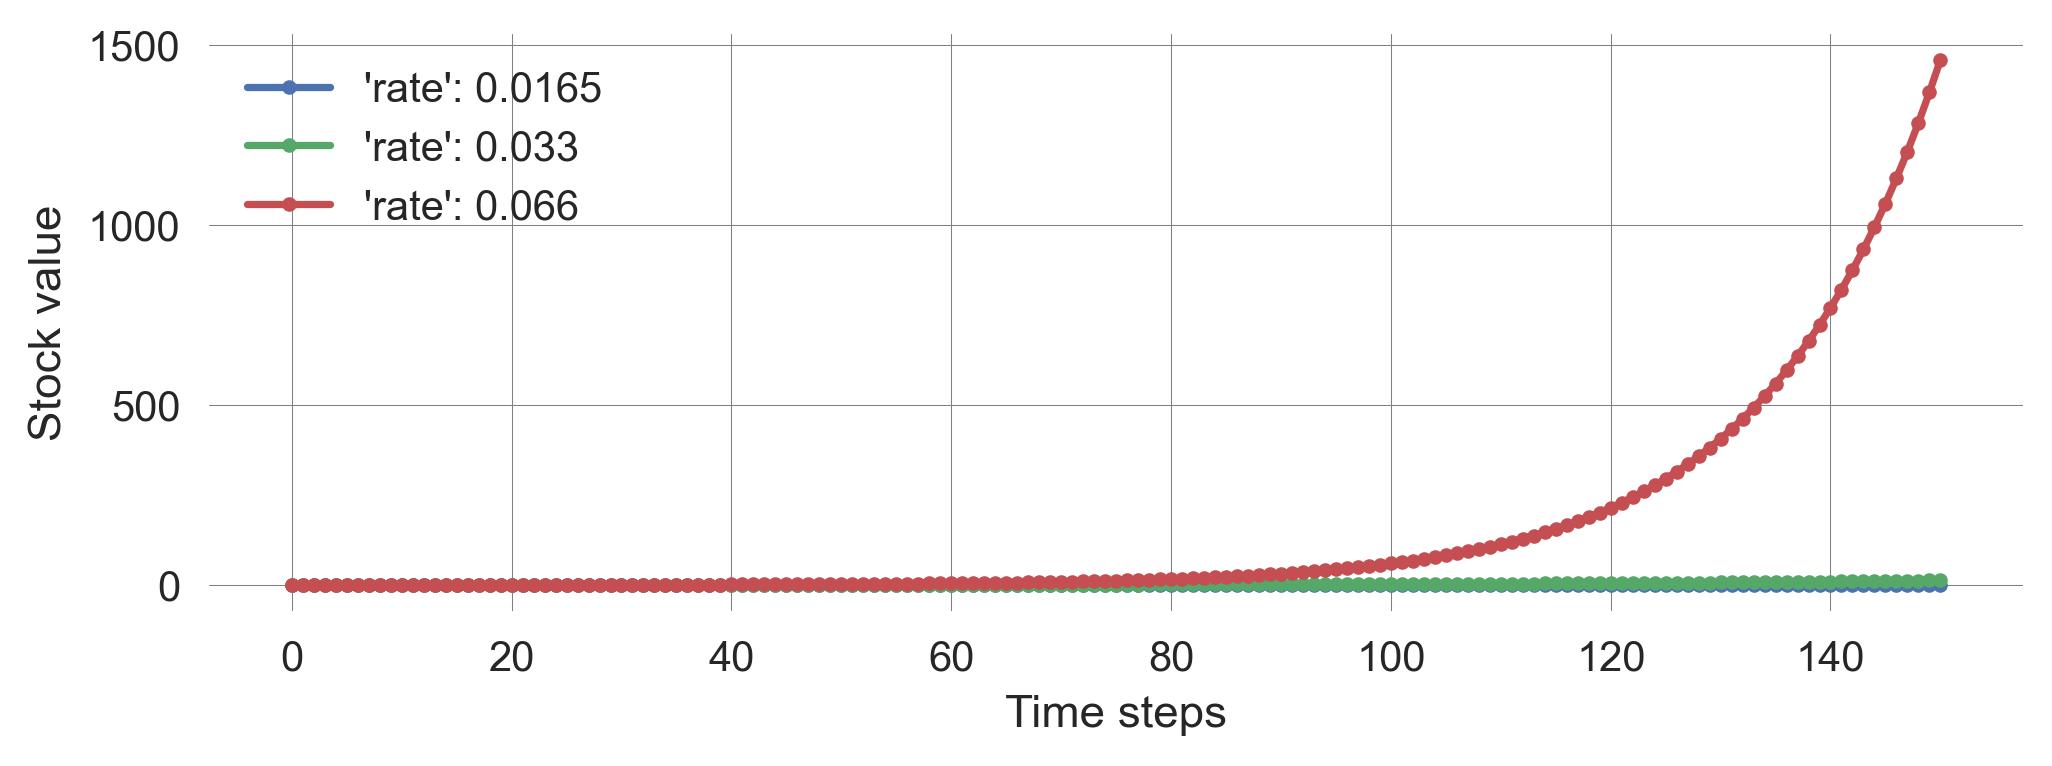

In [ ]:
#| fig-cap: Exponential growth with different rates
#| fig-label: fig-exponential-growth-different-rates
ts_half = plot_stock_evolution(150, 0.1, update_stock, rate=0.033/2)
ts_norm = plot_stock_evolution(150, 0.1, update_stock, rate=0.033)
ts_doub = plot_stock_evolution(150, 0.1, update_stock, rate=0.033*2)
plt.legend();

Thus, a halved rate leads to about a **10th of the stock** at the end:

In [ ]:
ts_norm[-1]/ts_half[-1]

np.float64(11.192852530716676)

And a doubled rate leads to about **100 times of the stock** at the end:

In [ ]:
ts_doub[-1]/ts_norm[-1]

np.float64(111.82334406335414)

> "*The greatest shortcoming of the human race is our inability to understand the exponential function*” - Albert Allen Bartlett

::: {.content-hidden unless-profile="interactive"}

When running this Jupyter Notebook, we can also interact with a function in real-time, observing how the output changes when we change the parameters.

**For example**, we can explore how this exponential growth at first looks like linear growth for small growth rates and only a few time steps.

In [ ]:
@interact(initial_value=(0.01, 1, 0.01), nr_timesteps=(10, 250, 10), rate=(0.01, 0.5, 0.01))
def interact_with_stock_evolution(initial_value=0.1, nr_timesteps=10, rate=0.01):
    plot_stock_evolution(nr_timesteps, initial_value, update_func=update_stock, rate=rate)
    plt.xlabel("Time steps [years]"); plt.ylabel("Anthropogenic\nCO2 emissions [GtC/year]");

interactive(children=(FloatSlider(value=0.1, description='initial_value', max=1.0, min=0.01, step=0.01), IntSl…

To do so, we can use the `interact` decorator from the `ipywidgets` library. A decorator is a special and convenient Python function that takes another function and extends its behavior without explicitly modifying it. This function allows us to create interactive controls for the function we want to explore. 
We define a `interact_with_stock_evolution`, which builds upon the `plot_stock_evolution` function we defined above, adding the `@interact` decorator to create interactive sliders for the inital value, the growth rate and the number of time steps. 
As we do not want to change the `update_stock` function interactively, we set this parameter within the `interact_with_stock_evolution` function and pass the `rate` parameter directly to the `plot_stock_evolution` function.

:::

**In summary**, in positive or reinforcing feedback loops, positive stock values cause the stock to **increase** proportionally to the stock level, leading to **exponential growth**.

### Negative feedback loops

At first glance, negative feedback loops appear quite similar to positive ones.

![Negative Feedback Loop](images/02.01-DynamicSystem-NegativeFeedback.dio.png)

However, here, positive stock values cause the stock to **decrease** proportionally to the stock value.

Mathematically, we write

$$ x_{t+1} = x_{t} - rx_{t} \quad \Leftrightarrow \quad \Delta x = -rx$$ 

with $r > 0$.

**Guess what will happen**, given a positive initial stock value.

1) The stock will shrink in a straight line to $-\infty$.
2) The stock will shrink in a straight line to 0.
3) The stock will shrink faster, i.e., on a downward-bending curve to $-\infty$.
4) The stock will shrink faster, i.e., on a downward-bending curve to 0.
5) The stock will shrink slower, i.e., on an upward-bending curve to $-\infty$.
6) The stock will shrink slower, i.e., on an upward-bending curve to 0.

Let's find out.

Fortunately, there's no need to create a new Python function. We can just insert negative growth rates into our current functions.

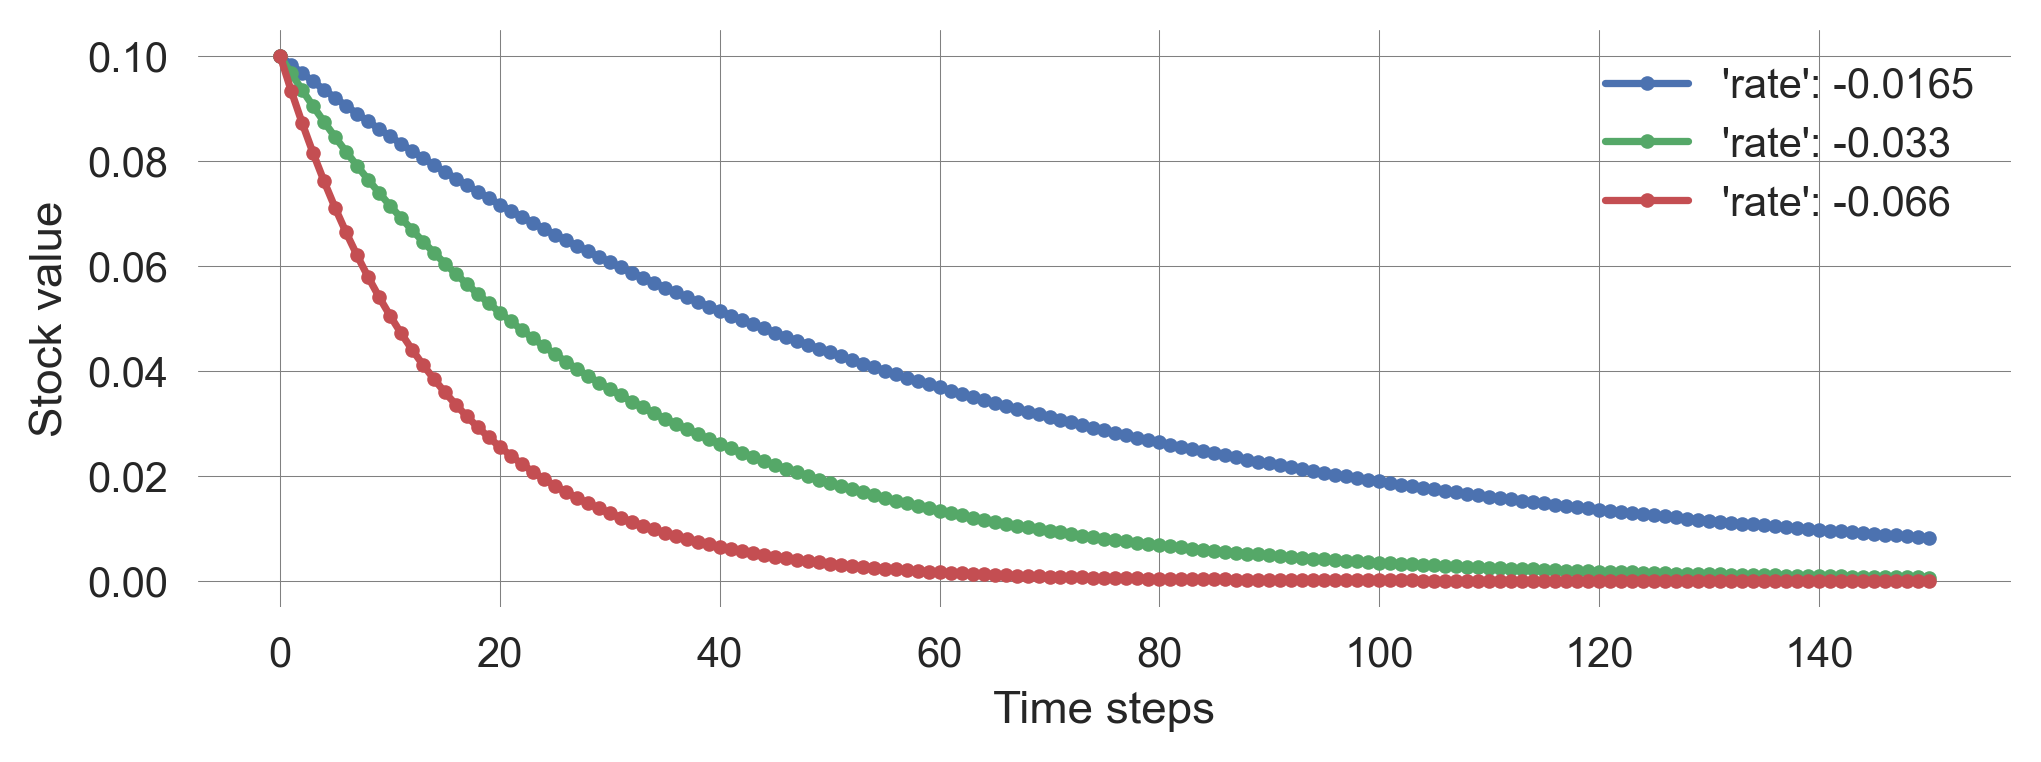

In [ ]:
#| fig-cap: Exponential decay with different rates
#| fig-label: fig-exponential-decay-different-rates
ts_half = plot_stock_evolution(150, 0.1, update_func=update_stock, rate=-0.033/2)
ts_norm = plot_stock_evolution(150, 0.1, update_func=update_stock, rate=-0.033)
ts_doub = plot_stock_evolution(150, 0.1, update_func=update_stock, rate=-0.033*2)
plt.legend();

Thus, the stocks shrink **faster than linearly** toward zero, with more negative growth rates causing faster decay. This process is also called **exponential decay**.

Since decay isn't inherently negative in a normative sense—consider environmental degradation—it's more accurate to refer to negative feedback loops as **balancing feedback loops**.

## Delays

So far, we have considered only **instantaneous feedback**. The stock change at the next step was caused directly by the current stock level. This is not always the case. 

**Delays** are a common and crucial feature in many dynamic systems. They result from the time it takes for a signal to travel to a stock or, vice versa, for a stock to react to a signal.

**How** can we **model** the concept of delays in a dynamic system?

In short, we consider **systems with multiple stocks**.

### Example | Economy-Innovation interactions

**For example**, let's consider the phenomenon of **economic growth**. 
The simplest model explanation is that economic development (e.g., measured by GDP) directly causes more economic development.
A slightly refined model explanation might be that economic development causes more innovation (e.g., measured by number of patents), which in turn causes more economic development.

![Two models of economic growth](images/02.01-EconomicGrowth.dio.png)

Both models show a **reinforcing feedback loop**, so we should **expect exponential growth** again.
But how do the rates of change relate to each other?

Let's first define a **mathematical model**. Let $x_t$ be the level of economic development and $y_t$ the level of innovations at time $t$. 

*Model 1*:
$$x_{t+1} = x_t + rx_t$$
where $r>0$ denotes a positive growth rate.

*Model 2*:
\begin{align}
x_{t+1} &= x_t + ay_t \\
y_{t+1} &= y_t + bx_t
\end{align}
where $a>0$ denotes the rate of converting innovations to economic development and $b>0$ denotes the rate of converting economic development to innovations.

Now, we convert the mathematical model into a **computational model**.

First, we define the `update_model` functions.

In [ ]:
def update_model1(x, r):
    x_ = x + r*x
    return x_

In [ ]:
def update_model2(z, a, b):
    x, y = z
    x_ = x + a*y
    y_ = y + b*x
    return x_, y_

Second, we define two `plot_evolution` functions, detailing the plotting of the economic development and innovation levels.

In [ ]:
def plot_model_evolution1(initial_value, nr_timesteps, 
                          **update_parameters):
    time_series = iterate_model(nr_timesteps, initial_value, 
                                update_model1, **update_parameters)
    plt.plot(time_series, '.--', color='purple',
             label="Economy1 | " + str(update_parameters)[1:-1]);
    return time_series

In [ ]:
def plot_model_evolution2(initial_value_x, initial_value_y,
                          nr_timesteps, **update_parameters):
    z = [initial_value_x, initial_value_y]
    time_series = iterate_model(nr_timesteps, z, update_model2, 
                                **update_parameters)
    plt.plot(time_series[:, 0], '.-', color='red',
             label="Economy2 | "+str(update_parameters)[1:-1]);
    plt.plot(time_series[:, 1], '.-', color='blue');
    
    return time_series

Last, we define a `compare_model` function, which sets the initial levels of the economies as identical and has descriptive parameters for easy interpretation of the model results.

In [ ]:
def compare_models(economy=1.0, innovation=1.0, timesteps=20, 
                   selfrate=0.2, innoTOecon=0.01, econTOinno=4.0,
                   ymax=40):
    plot_model_evolution2(economy, innovation, timesteps, 
                          a=innoTOecon, b=econTOinno);
    plot_model_evolution1(economy, timesteps, r=selfrate);
    plt.ylim(0, ymax); plt.legend()

We set the default parameter so that in *model 1*, there is a default growth rate of 0.2. In *model 2*, we assume that innovations take a long time to result in economic development (i.e., the rate from innovation to the economy is small, a 20th compared to the default rate of *model 1*, to be precise). Even if the rate of converting economic development to innovation is 20 times larger than the default rate, economic growth in *model 2* is slower than in *model 1*.



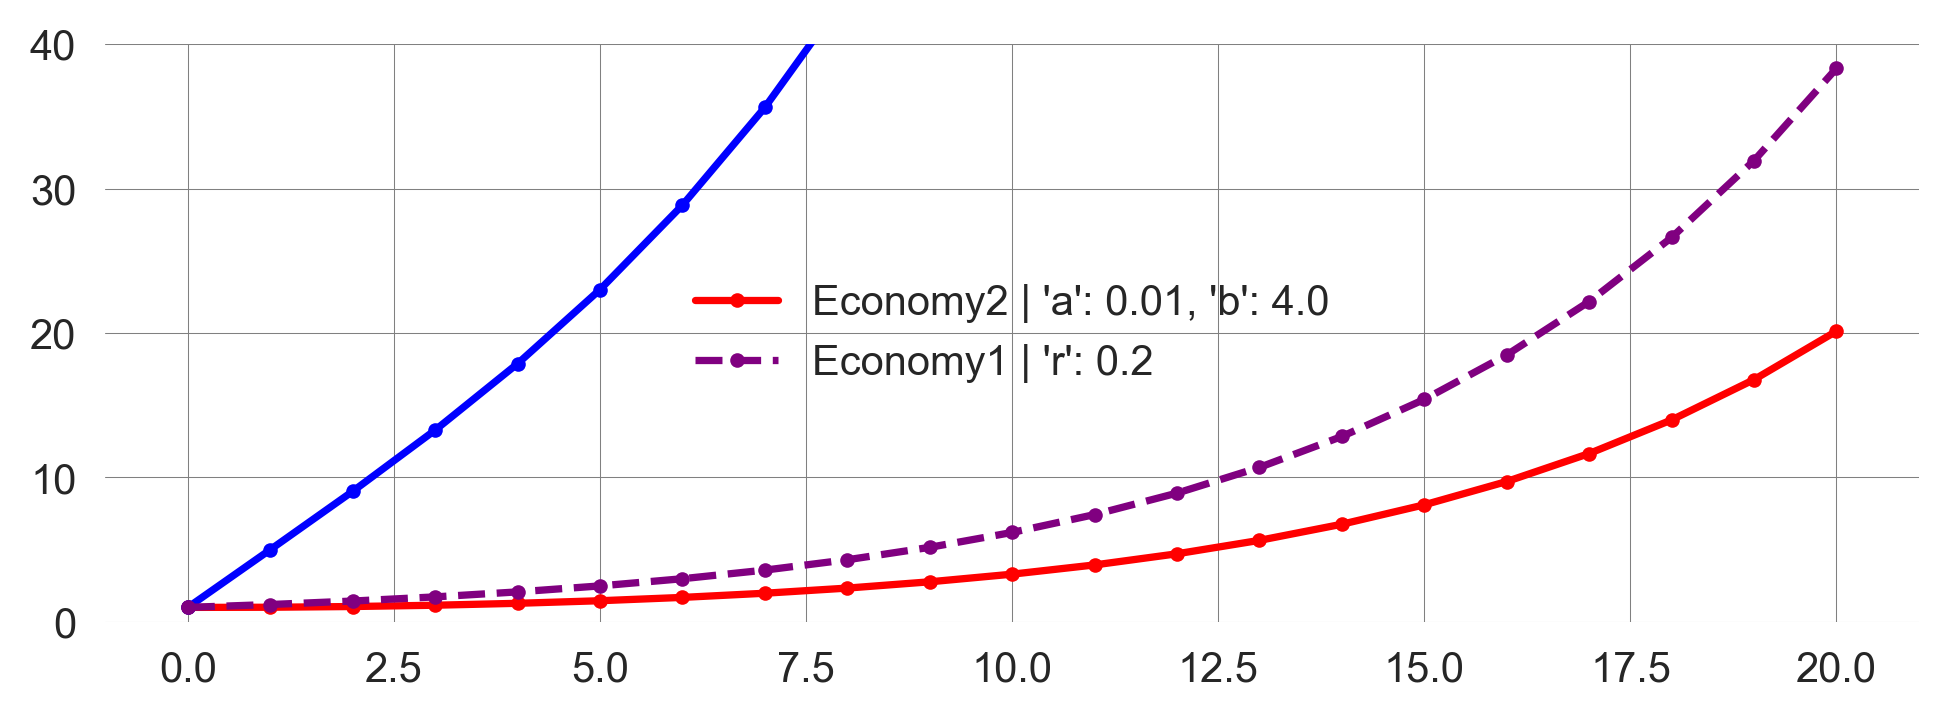

In [ ]:
#| label: fig-default-economy-innovation-interactions
#| fig-cap: Default Economy-Innovation interactions
compare_models()

How could be boost growth in *model 2*? 

One way could be to increase the number of innovations.

::: {.content-hidden unless-profile="interactive"}

In [ ]:
@interact(innovation=(1.0, 50., 0.05))
def boost_innovation(innovation=1.0):
    compare_models(innovation=innovation)

interactive(children=(FloatSlider(value=1.0, description='innovation', max=50.0, min=1.0, step=0.05), Output()…

:::

It would require a 20-fold increase in the number of innovations to match the growth rate of *model 1*. This is also intuitive: if it takes 20 times longer for innovations to result in economic development, we need 20 times more innovations to achieve the same growth rate. Compare @fig-economy-boosted-innovation-interactions with @fig-default-economy-innovation-interactions.

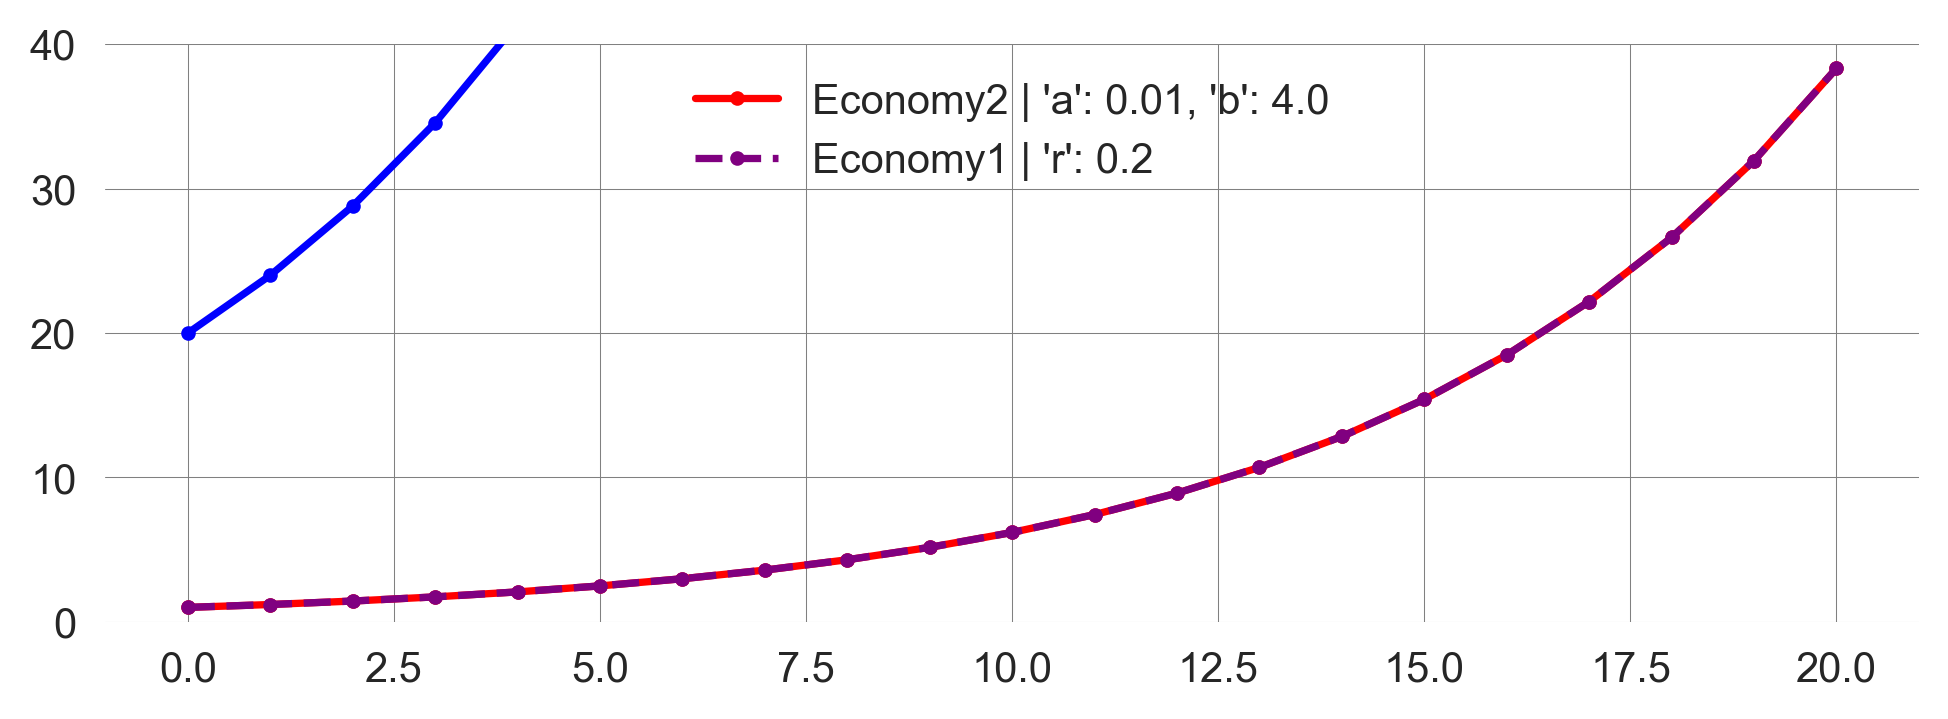

In [ ]:
#| label: fig-economy-boosted-innovation-interactions
#| fig-cap: Economy-Innovation interactions with a 20-fold increase in innovations
compare_models(innovation=20)

**Is there another way?**

How much would the rate of converting economic development into innovations increase to match economic growth in *model 1*?

How much would we need to change the rate of converting innovations to economic development in *model 2* to outperform the economic growth of *model 1*?

::: {.content-hidden unless-profile="interactive"}

In [ ]:
@interact(econTOinno=(0.0, 10.0, 0.01), innoTOecon=(0.0, 0.1, 0.001))
def interact_with_model_comparison(innoTOecon=0.01, econTOinno=4.0):
    compare_models(econTOinno=econTOinno, innoTOecon=innoTOecon, )

interactive(children=(FloatSlider(value=0.01, description='innoTOecon', max=0.1, step=0.001), FloatSlider(valu…

:::

We need to increase either the innovation-to-economy or the economy-to-innovation rate by a factor of approx. 1.45 to match the sizes of the economies after 20 time periods (@fig-economy-innovation-boosted-interactions).

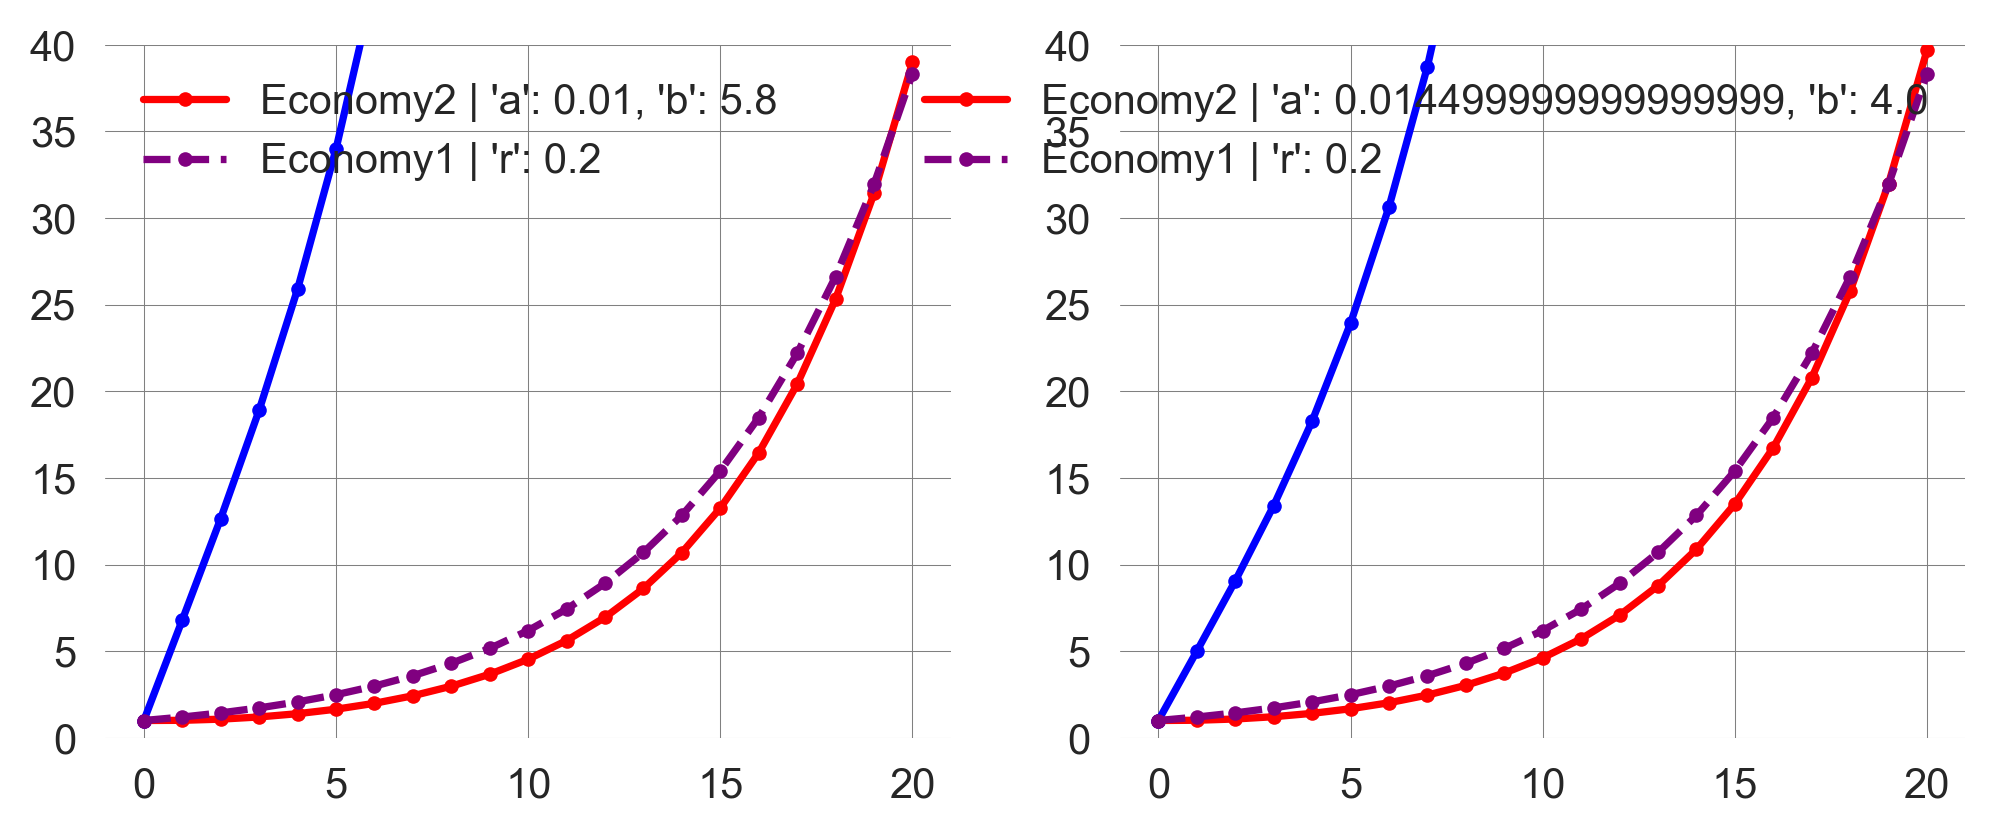

In [ ]:
#| label: fig-economy-innovation-boosted-interactions
#| fig-cap: Economy-Innovation interactions with a 1.45-fold increase of a single conversion rate
fig = plt.figure(figsize=(8,3))
ax1 = fig.add_subplot(121) # LEFT PLOT
compare_models(econTOinno=4.0*1.45)
ax2 = fig.add_subplot(122) # RIGHT PLOT
compare_models(innoTOecon=0.01*1.45)

Since the innovation-to-economy rate is minimal initially, this might be the more accessible lever to pull.

> A key insight for policy interventions from dynamic system models is that it can be much more effective to intervene in the systems' dynamics than in the systems' state variables.

### Example | Economy-Nature interactions

One of the defining themes of this course is that we are embedded in the biosphere. Economic growth depends on an intact natural environment, whereas current economic practices negatively impact the state of nature. Let's assume the following feedback structure.

![Economy-Nature interactions](images/02.01-EconomyNature.dio.png){#fig-EconomyNature}

Assuming the feedback structure defined in @fig-EconomyNature, we can reuse our code block from above.

Let's assume that economic and natural capital start at a base level of 1. Economic growth depends positively on the state of natural capital (assuming a base rate of 0.1). In contrast, natural capital changes depend negatively on economic capital but on a slower timescale (let's take a rate of 0.005). Of course, these parameters serve mainly illustrative purposes.

In [ ]:
def plot_EconomyNature(economy=1.0, nature=1.0, timesteps=100, 
                       natTOecon=0.1, econTOnat=-0.005):
    plot_model_evolution2(economy, nature, timesteps, 
                          a=natTOecon, b=econTOnat);
    plt.legend()

The economy starts growing linearly while nature degrades. At around 60 periods, the economy reaches a maximum and enters a recession while nature continues to degrade (@fig-economy-nature-time-evolution-100).

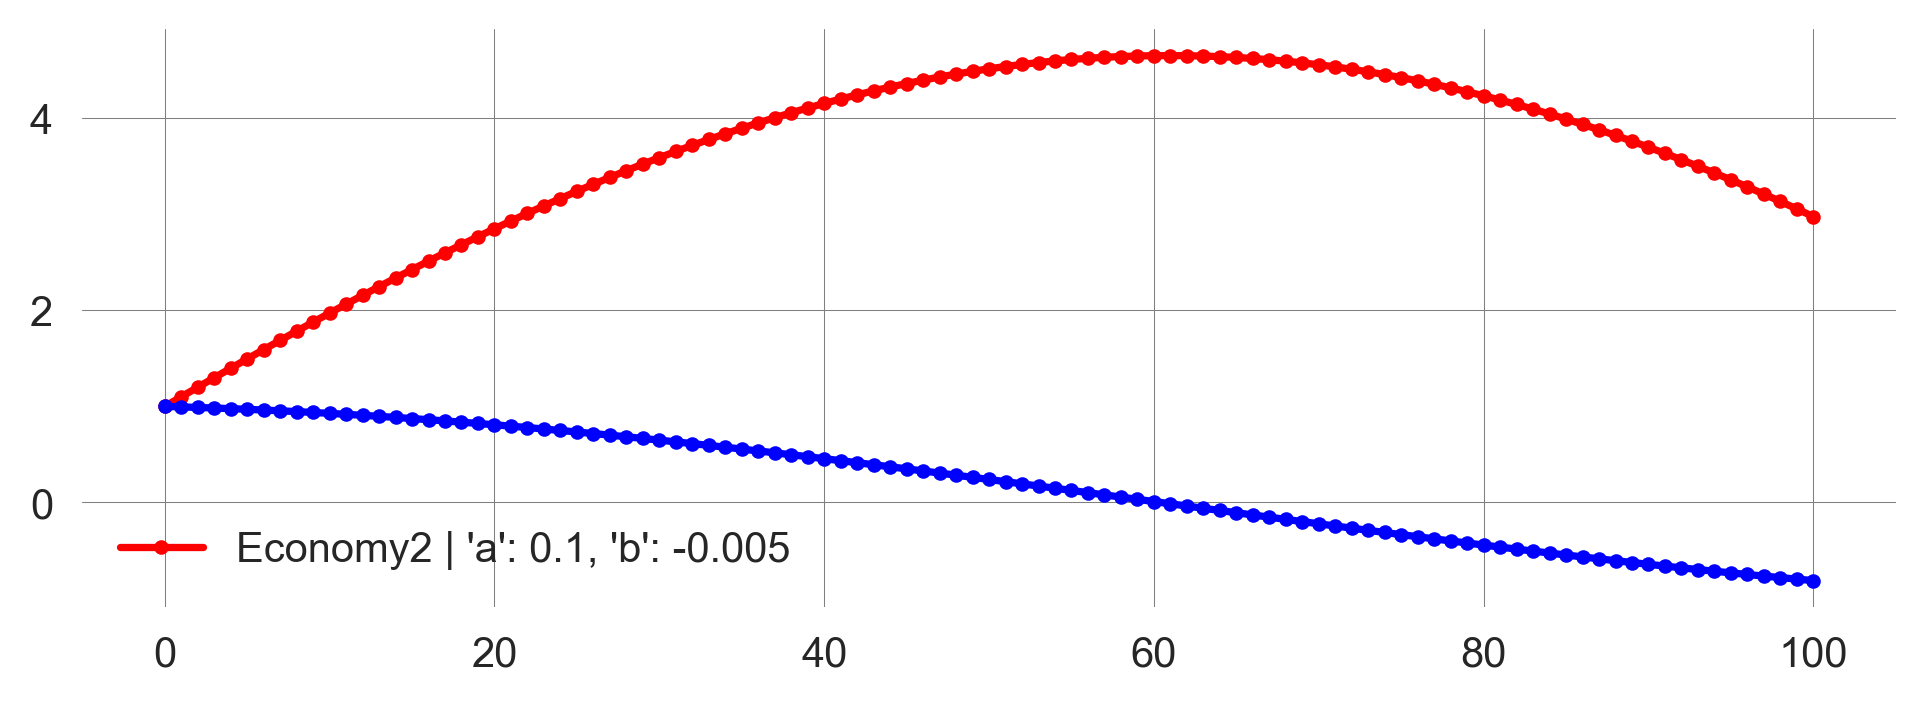

In [ ]:
#| label: fig-economy-nature-time-evolution-100
#| fig-cap: Economy-Nature interactions over 100 periods
plot_EconomyNature()

What happens if we continue the simulation for 1000 periods?

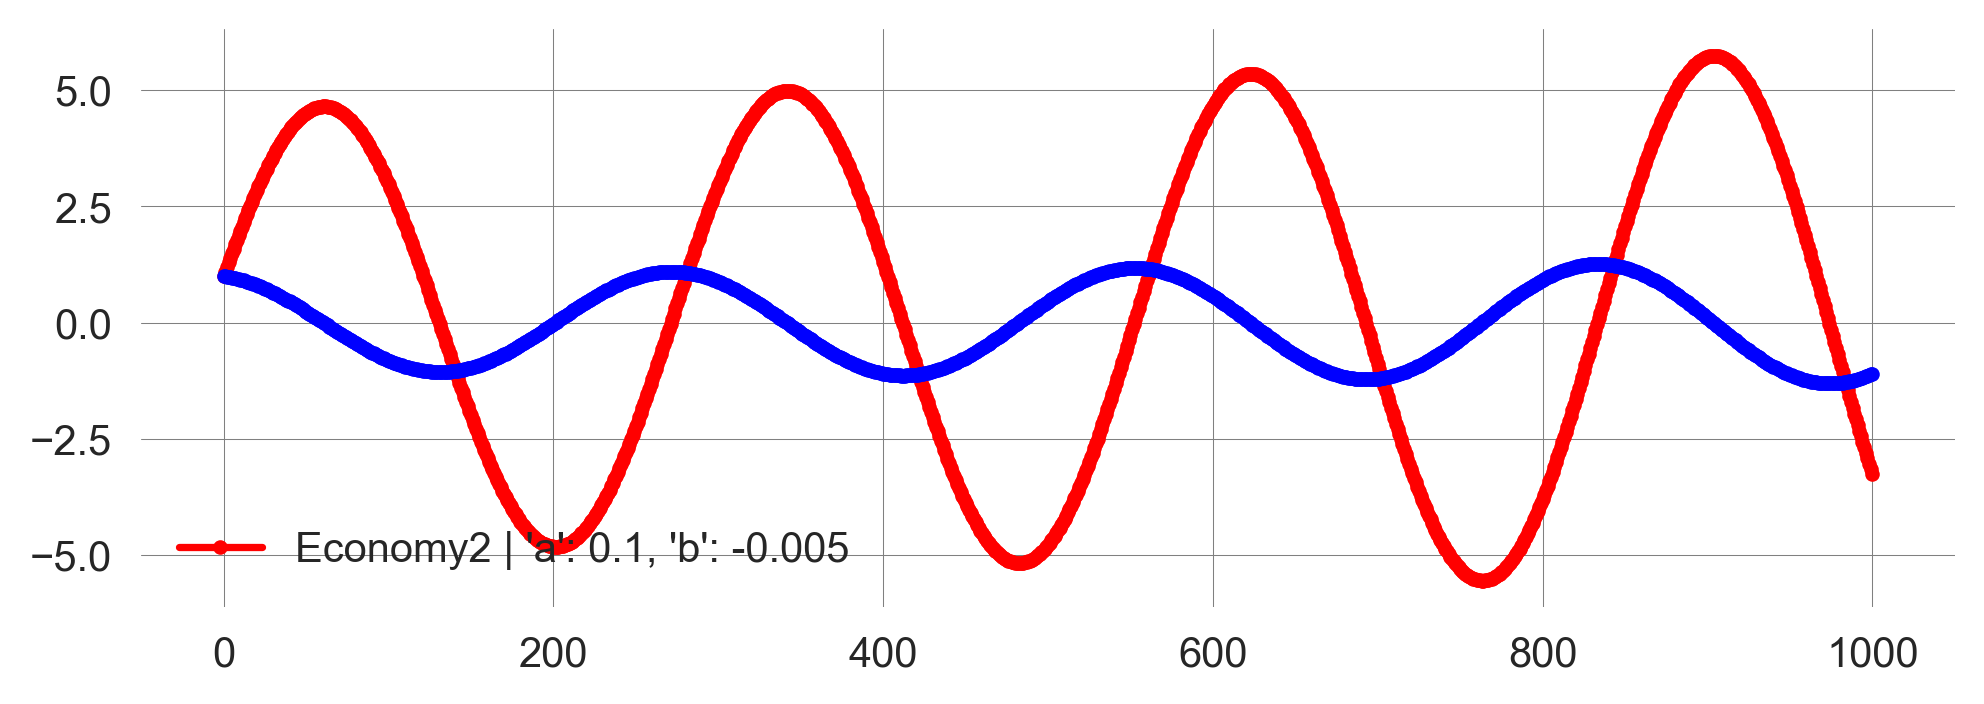

In [ ]:
#| label: fig-EconomyNature-M
#| fig-cap: Economy-Nature interactions over 1000 periods
plot_EconomyNature(timesteps=1000)

We observe ossilations in the levels of economic and natural capital. The economy grows, but the environment degrades, leading to an economic recession. The environment recovers, and the economy starts growing again, leading to another recession. This cycle repeats indefinitely.

Mathematically, this behavior can be explained by the fact, that both economic and natural capital can have negative values. It is not straitforward to interpret negative values in this context. In effect, a negative value of economic capital results in a net positive effect on natural capital, and a negative value of natural capital results in a net negative effect on economic capital, i.e., when enviornmental damages are high, the economy is likely to suffer.

How special is this ossilatory behavior? Is it due to the specific parameters we chose? Or is it a general feature of the model structure?

::: {.content-hidden unless-profile="interactive"}

Of course, we can explore the model behavior by changing the parameters interactively.

In [ ]:
interact(plot_EconomyNature, economy=(0.1, 2, 0.1), nature=(0, 2, 0.1), 
         natTOecon=(0.0, 10, 0.01), econTOnat=(-10.0, 0.0, 0.01),
         timesteps=(10, 500, 10),);

interactive(children=(FloatSlider(value=1.0, description='economy', max=2.0, min=0.1), FloatSlider(value=1.0, …

It seems, that the ossilatory behavior is a general feature of the model structure. But can we be certain?

:::

To study the possible behavior of a sytem a bit of theory is useful.

### DeepDive | Autonomous first-order systems are all you need


Here, we make sure that we do note forget to analyze some system structures. We show that so-called autonomous first-order systems are all we need to model any dynamic system.

In this DeepDive, we answer the question of why we did not consider dynamic equations which take into account the system state of longer than just one time step ago and why we did not model systems which depend explicitly on time. The short answer is, we do not need to. These modifications will not give rise to fundamentally different behavior. We can always represent these modification by introducing additional state variables.

**Let us first introduce some terminology.**

 A system is called *first-order* if it depends only on the state of the system at the previous time step.

**First-order system**: A difference equation whose rules involve state variables of the immediate past only,
$$x_t = F(x_{t-1}).$$

**Higher-order system**: Anything else,
$$x_t = F(x_{t-1}, x_{t-2}, x_{t-3}, \dots).$$


A system is called *autonomous* if it does not depend explicitly on time.

**Autonomous system**: A dynamical equation whose rules don’t explicitly include time or any other external variables
$$x_t = F(x_{t-1}).$$

**Non-autonomous system**: A dynamical equation whose rules do include time or other external variables explicitly,
$$x_t = F(x_{t-1}, t).$$

Non-autonomous, higher-order difference equations can always be converted into autonomous, first-order forms, by introducing additional state variables.    


For example, the *second-order difference equation*,
$$x_t = x_{t-1} + x_{t-2} \quad \text{aka the Fibonacci sequence}$$
can be converted into a first-order form by introducing a “memory” variable,
$$y_t = x_{t-1} \Leftrightarrow y_{t-1} = x_{t-2}$$

Thus, the equation can be rewritten as follows

\begin{align}
x_{t} &= x_{t-1} + y_{t-1} \\
y_{t} &= x_{t-1}
\end{align}

*This conversion technique works for any higher-order equations as long as the historical dependency is finite.*

Similarly, a *non-autonomous equation* 
$$ x_t = x_{t-1} + t$$
can be converted into an autonomous form by introducing a “clock” variable,
$$ z_t = z_{t-1} + 1, z_0 = 0$$

Then, 

$$x_t = x_{t-1} + z_{t-1}$$

**Take-home message**. Autonomous first-order equations can cover all the dynamics of any non-autonomous, higher-order equations.
We can safely focus on *autonomous first-order equations* without missing anything fundamental.


### Matrix representation

In this section, we will see how to represent a system of difference equations in matrix form. This representation is useful for analyzing the system's behavior, especially when the system has multiple stocks.

Let's consider a general model with two stock variables,

\begin{align}
x_{t+1} &= ax_t + by_t, \\
y_{t+1} &= dy_t + cx_t.
\end{align}

We can rewrite these equations with a matrix multiplication,

$$
\left(\begin{matrix}
x_{t+1} \\
y_{t+1}
\end{matrix}\right) =
\left(\begin{matrix}
a & b \\
c & d
\end{matrix}\right)
\left(\begin{matrix}
x_{t} \\
y_{t}
\end{matrix}\right)
$$



This idea **generalizes to any number of stock variables**. Consider a system with $n$ stocks, denoted by $x^1$, $x^2$, ..., $x^n$ and influence coefficients $a_{ij}$, for $i,j \in \{1,2,\dots,n\}$, denoting the influence stock $x^{2}_t$ at time $t$ has on the stock $x^{1}_{t+1}$ at time $t+1$. We can convert this logic into the following system of update equations,

\begin{align}
x^{1}_{t+1} &= a_{11} x^{1}_t + a_{12} x^{2}_t + \dots + a_{1n} x^{n}_t \\
x^{2}_{t+1} &= a_{21} x^{1}_t + a_{22} x^{2}_t + \dots + a_{2n} x^{n}_t \\
  \vdots \quad &= \quad \vdots \qquad\qquad \cdots \qquad\qquad \vdots \\  
x^{n}_{t+1} &= a_{n1} x^{1}_t + a_{n2} x^{2}_t + \dots + a_{nn} x^{n}_t.
\end{align}

Equivalently, we can summarize all stocks $x^1$, $x^2$, ..., $x^n$ into a vector $\mathbf{x}$ and all influence coefficients into a matrix $\mathbf A,$ with

$$
\mathbf{x} = 
\left(\begin{matrix}
x^1 \\
x^2 \\
  \vdots \\  
x^n
\end{matrix}\right),
\qquad
\mathbf{A} =
\left(\begin{matrix}
a_{11} & a_{12} & \dots  &a_{1n} \\
a_{21} & a_{22} & \dots &a_{2n} \\
  \vdots & \vdots & \cdots &\vdots \\  
a_{n1} & a_{n2} & \dots &a_{nn}
\end{matrix}\right).
$$



Doing so simplifies the form of the update equation to 

$$ \mathbf x_{t+1} = \mathbf A \mathbf x_t. $$

*Some definitions*.

We call the number of state variables needed to specify the system’s state uniquely the **degrees of freedom**. 

A **phase space** of a dynamic system is the theoretical space where every state of the system is mapped to a unique spatial location. 

Thus, the degrees of freedom of a dynamic system equals the dimensionality of its phase space.

## Long-term behavior and stability analysis

Playing with a computer model is fun, but the range of possibilities becomes enormous too quickly. 

In this section, we will obtain a so-called **closed-form solution** for the time evolution of our systems. This means we write down an equation that gives us the system state for each point in time without the need to iterate the difference equation forward. This is particularly useful if we want to understand the very **long-term behavior** of systems, as this would require many simulation steps. These steps are crucial to understanding what it means for a system state to be **stable**.

### Closed-form solution for 1D systems

For one-dimensional systems, we can write

$$ x_{t+1} = ax_t $$

This means the system state at time $t=1$ is $x_1 = ax_0$. At time $t=2$, the system state is $x_2 = ax_1 = aax_0 = a^2 x_0$. Thus, generalizing this pattern yields the system state at time $t$ to be


$$ x_t = x_0 a^t $$

This means, we can directly calculate the system state at any point in time without the need to iterate the difference equation forward.

**For example**, let's say we want to calculate only each 10th time step,

In [ ]:
t = np.arange(0, 101, 10)
t

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

The system state is,

In [ ]:
x_0 = 1.2; r = 0.05
x_0 * (1 + r)**t

array([  1.2       ,   1.95467355,   3.18395725,   5.18633085,
         8.44798645,  13.76087974,  22.41502307,  36.51171064,
        59.47372928,  96.87643806, 157.80150942])

Here, we made use of the element-wise exponentiation of NumPy arrays. This means that each element of the array is raised to the power of the corresponding element of the other array. This a very convenient feature of NumPy, as it allows us to perform operations on arrays without the need for explicit loops.

To check, whether our closed-form solution works, we compare it to the simulation results. 

In [ ]:
def compare_solutions(initial_value=1.2, nr_timesteps=100, rate=0.05):
    plot_stock_evolution(initial_value=initial_value, 
                         nr_timesteps=nr_timesteps,
                         update_func=update_stock, rate=rate)
    t = np.arange(0, nr_timesteps+1, 5); 
    plt.plot(t, initial_value*(1+rate)**t, 'X', color='red', 
             label='Analytical solution');
    plt.legend()

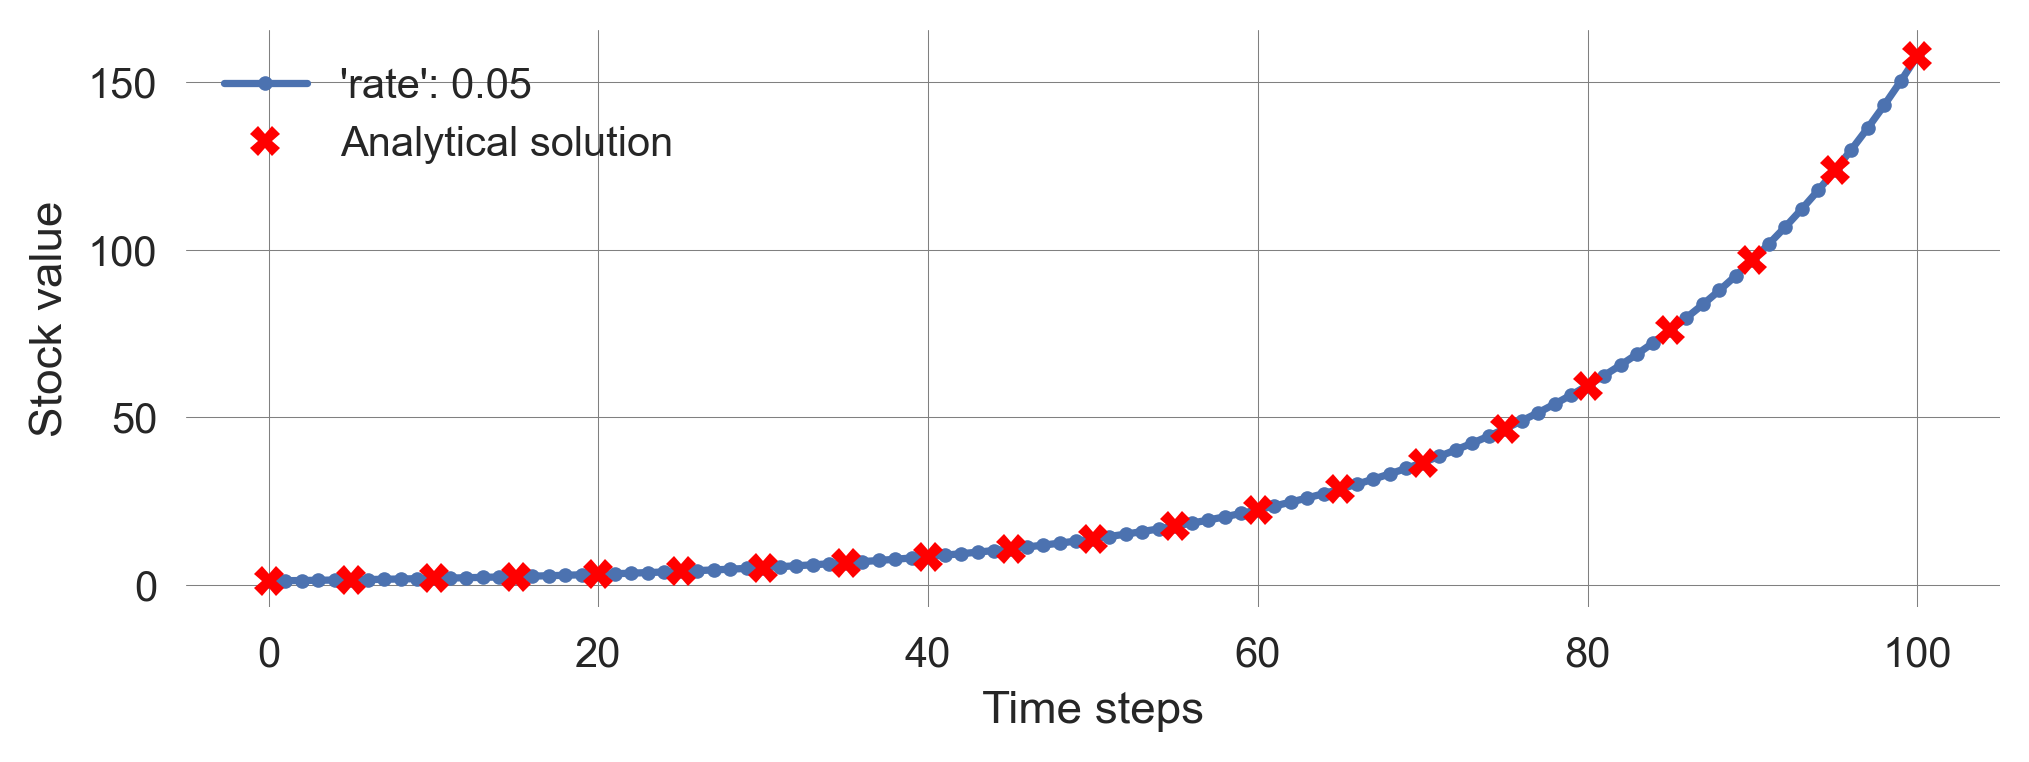

In [ ]:
#| fig-cap: Comparison of simulation and closed-form solution
#| fig-label: fig-compare-simulation-closedform
compare_solutions()

::: {.content-hidden unless-profile="interactive"}

In [ ]:
interact(compare_solutions, initial_value=(0.1, 2, 0.1),
         nr_timesteps=(10, 500, 10), rate=(-2, 2, 0.01));

interactive(children=(FloatSlider(value=1.2, description='initial_value', max=2.0, min=0.1), IntSlider(value=1…

:::

**Try it out with different parameter values and observe that the closed-form solution matches the simulation results perfectly.**

### Cobweb plots

Cobweb plots are a graphical tool to understand the dynamics of one-dimensional systems.

The idea is to plot the system state at time $t+1$ against the system state at time $t$. Including the system's udpate function $F(x_t)$, together with the identity line, $y=x$, allows us to see how the system evolves over time. The next system state is obtained by a vertical line from the current state to the system update function. From this point, a horizontal line to the identity line makes the *next* system state, the *current* system state. Thus, the system evolution is represented by horizontal and vertical lines, hence the name, because the resulting picture resembles a cobweb. 

In [ ]:
def cobweb(update_func, initial_value, nr_timesteps=10, ax=None, **update_params):
    x=initial_value; h=[x]; v=[x];  # lists for (h)orizontal and (v)ertical points
    for _ in range(nr_timesteps):  # iterate the dynamical system
        x_ = update_func(x, **update_params)  # get the next system's state 
        h.append(x); v.append(x_)  # going vertically (changing v)
        h.append(x_); v.append(x_)  # going horizontially (changing h)
        x = x_  # the new system state becomes the current state

    fix, ax = plt.subplots(1,1) if ax is None else None, ax  # get ax
    ax.plot(h, v, 'k-', alpha=0.5)  # plot on ax
    if np.allclose(h[-2],h[-1]) and np.allclose(v[-1],v[-2]):
        # if last points are close, assume convergence
        ax.plot([h[-1]], [v[-1]], 'o', color='k', alpha=0.7)  # plot dot
        
    return h, v

We study the simple system $x_{t+1} = ax_t$.

In [ ]:
def Flin(x, a): return a*x
def plotF(a, x0=1.4):   
    fix, ax = plt.subplots(1,2, figsize=(12, 3.5));  # axes and limits
    ax[0].set_xlim(-1,2); ax[0].set_ylim(-1,2), ax[1].set_ylim(-1,2)

    xs = np.linspace(-1, 2, 101); # plot F(x) and x
    ax[0].plot(xs, Flin(xs, a), label="F(x)"); ax[0].plot(xs, xs, label="x")
    ax[0].legend(); ax[0].set_xlabel('system state x'); ax[0].set_ylabel('system state x')

    h,v = cobweb(update_func=Flin, initial_value=x0, a=a, nr_timesteps=20, ax=ax[0]);  # include cobweb
    
    plot_stock_evolution(initial_value=x0, nr_timesteps=20, update_func=Flin, a=a);
    plt.xlabel("Time steps"); plt.tight_layout()  # make axis fit nicely

For example, with $a=0.8$, we observe the cobweb plot in @fig-cobweb-a0o8.

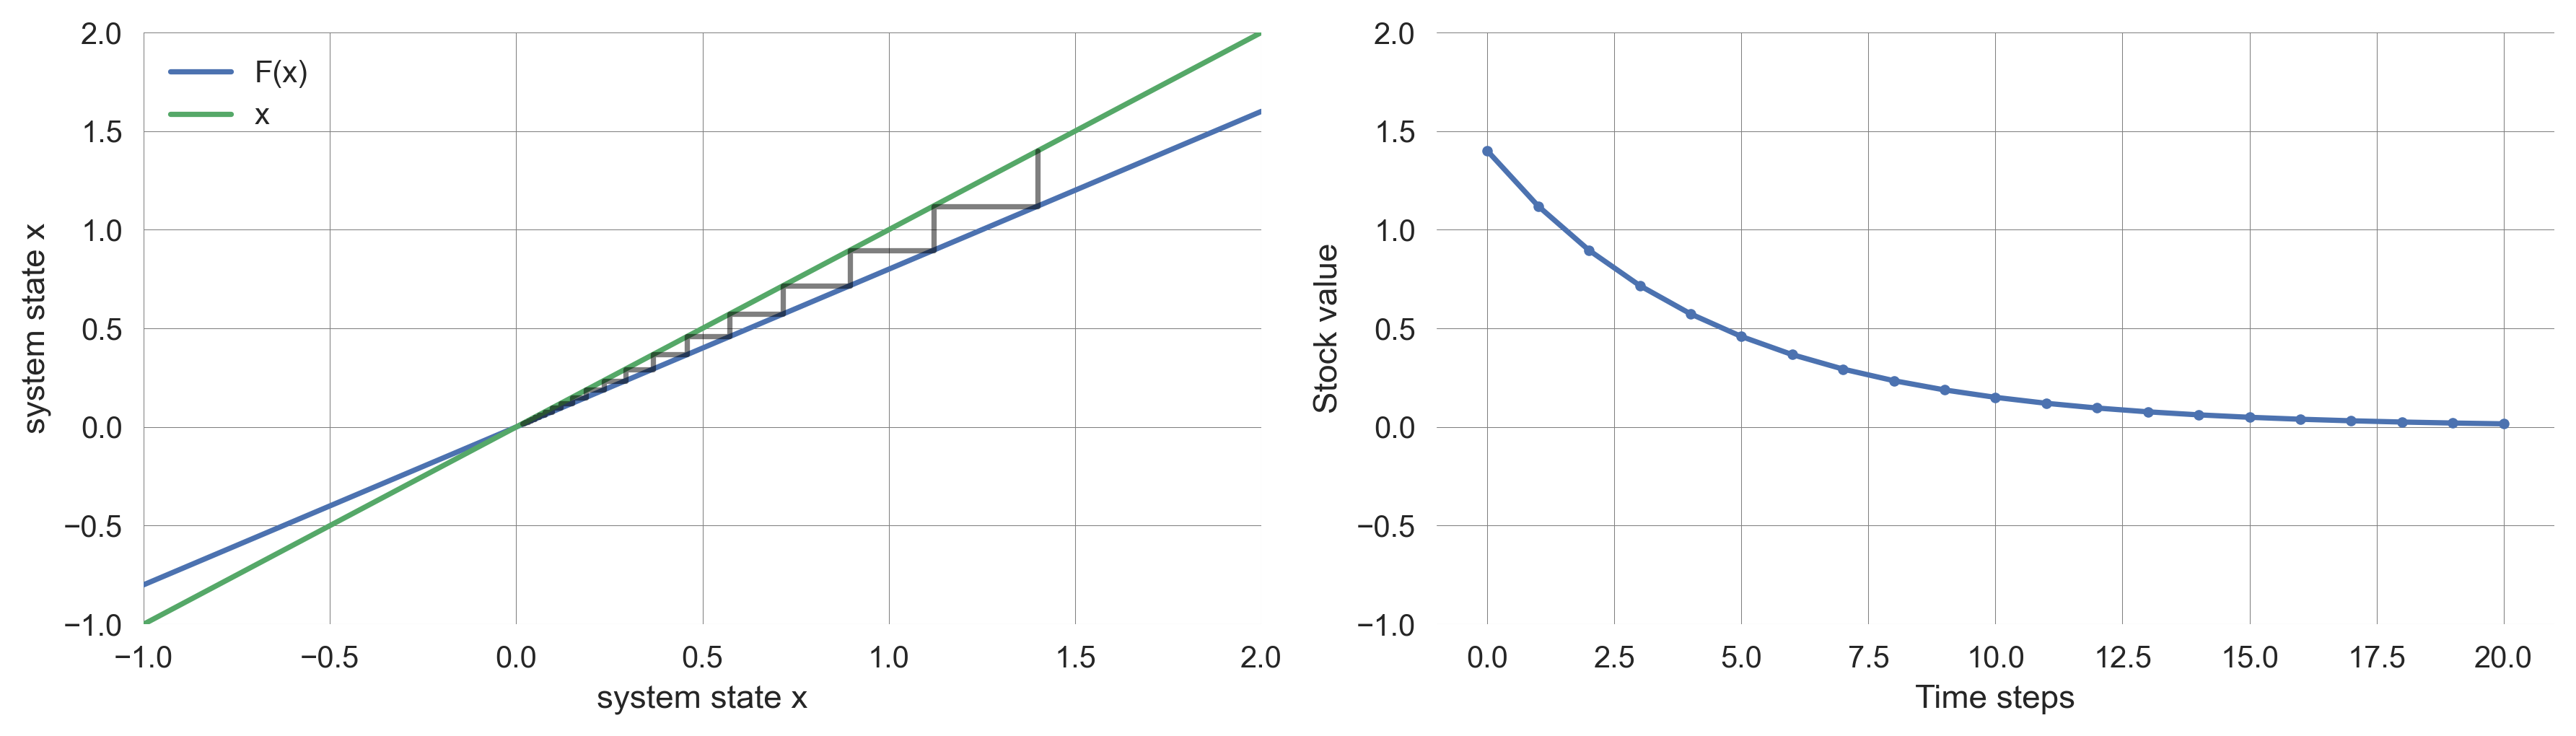

In [ ]:
#| label: fig-cobweb-a0o8
#| fig-cap: Example of a cobweb plot.
plotF(a=0.8)

::: {.content-hidden unless-profile="interactive"}

In [ ]:
interact(plotF, a=(-3,3,0.1), x0=(-1,1,0.1));

interactive(children=(FloatSlider(value=0.0, description='a', max=3.0, min=-3.0), FloatSlider(value=1.0, descr…

:::

Convince yourself about the following **observations**:

- $\ \ \ 1 < a \qquad \ {}$: Divergences to infinity
- $\qquad \ a= \ \ \ 1$: Conserved behavior
- $\ \ \ 0 < a< \ \ \ 1$: Convergence to fixed point
- $-1<a< \ \ \ 0$: Convergence to fixed point with transient oscillatory behavior
- $\qquad \ a=-1$: Conserved oscillatory behavior
- $\qquad \ a<-1$: Divergend ossiliaroty behavior

We can summarize these observations into **three qualitatively distinct cases** for the asymptotic behavior of linear systems.

1) $|a|<1$: The system converges to fixed point
2) $|a|>1$: The system diverges to infinity
2) $|a|=1$: The system is conserved


How do these observations generalize to multi-dimensional systems?

### Multi-dimensional phase space vizualization

Let us first create a general, multi-dimensional update function.

In [ ]:
def update_general_model(x, A): return A@x

Here, the `@` operator is used for matrix multiplication.

Then, we create a `plot_flow` function, using the `matplotlib.quiver` function.

In [ ]:
def plot_flow(A, extent=10, nr_points=11, ax=None):
    if ax is None: 
        fig = plt.figure(figsize=(9,3)); ax = fig.add_subplot(132)
        fig.add_subplot(131, yticks=[], xticks=[])
        fig.add_subplot(133, yticks=[], xticks=[])
        
    x = y = np.linspace(-extent, extent, nr_points)  # the x and y grid points
    X, Y = np.meshgrid(x, y)  # transformed into a meshgrid
    
    dX = np.ones_like(X); dY = np.ones_like(Y)  # containers for the changes
    for i in range(len(x)):  # looping through the x grid points
        for j in range(len(y)):  # looping through the y grid points
            s = np.array([x[i], y[j]]) # the current state
            s_ = update_general_model(s, A) # the next state
            ds = s_ - s # the change in state
            dX[j,i] = ds[0]  # capturing the change along the x-dimension
            dY[j,i] = ds[1]  # captuaring the change along the y-dimension
    
    q = ax.quiver(X, Y, dX, dY, angles='xy')  # plot the result
    ax.set_xlabel('x-stock level'); ax.set_ylabel('y-stock level')

Let's test our `plot_flow` function with a random two-by-two matrix.

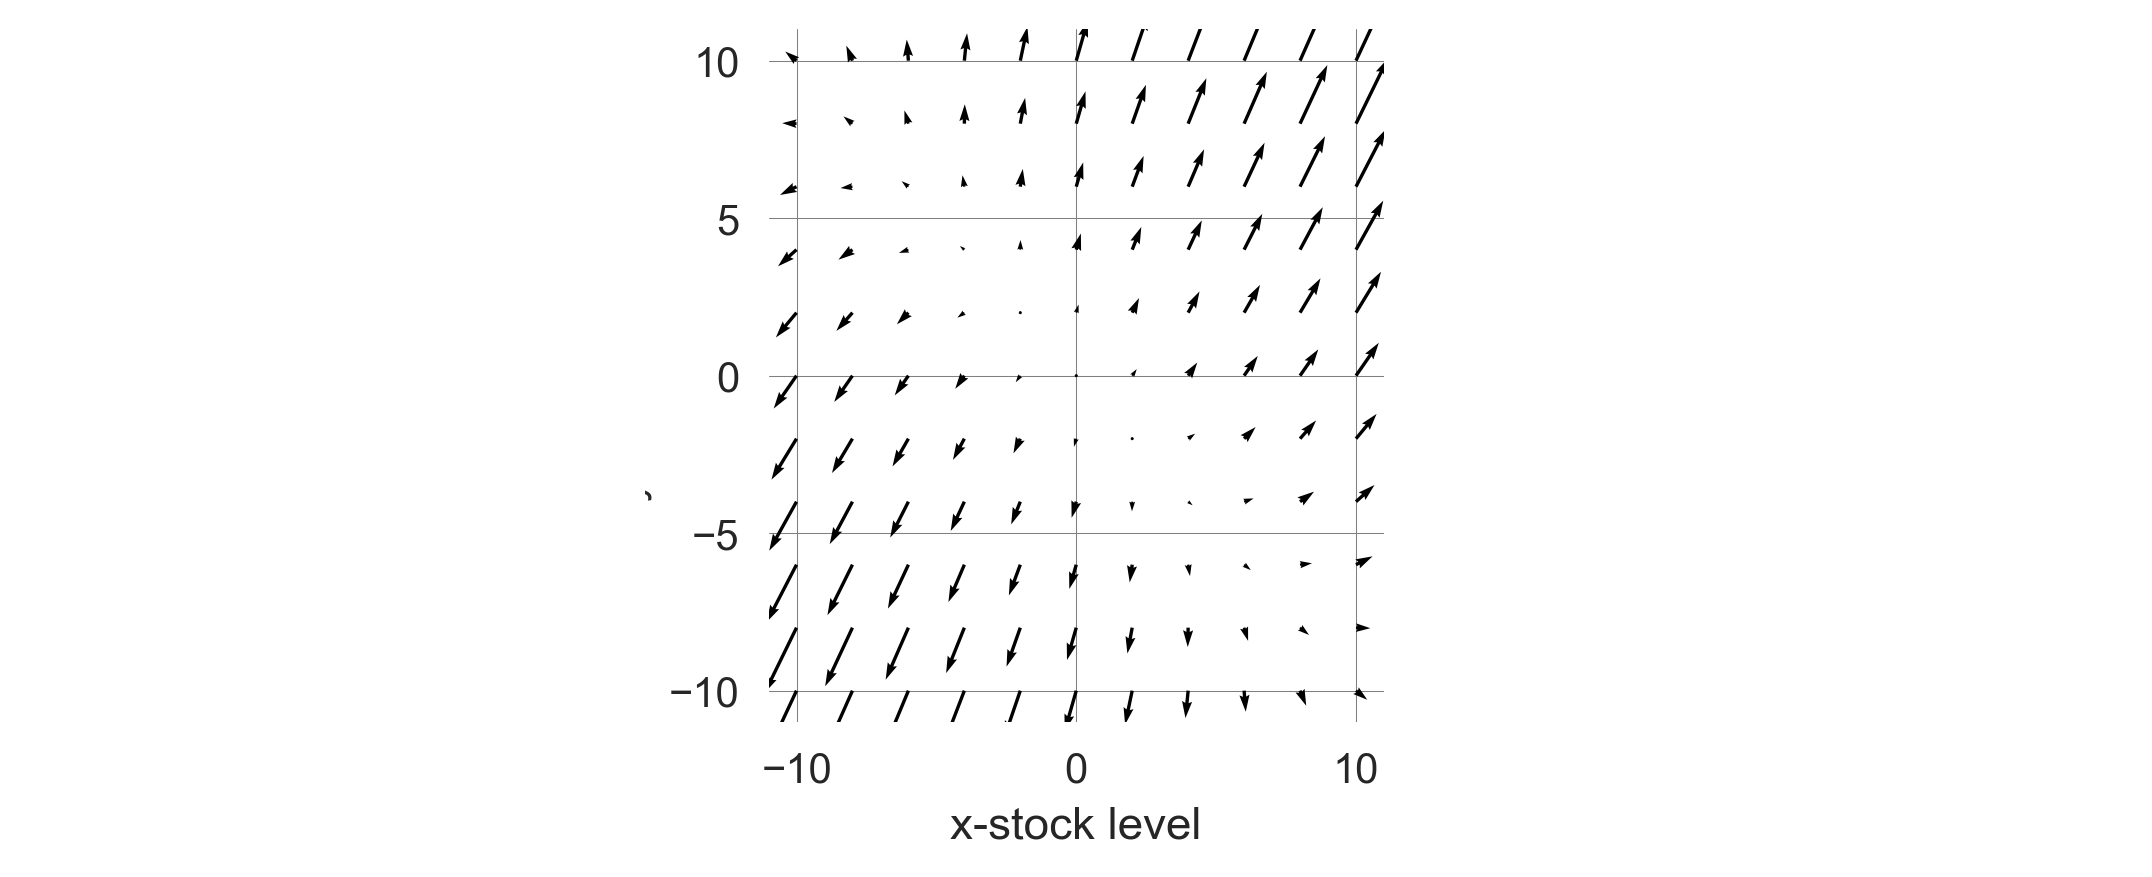

In [ ]:
#| fig-cap: Example of a phase space flow
#| fig-label: fig-phase-space-flow-example
np.random.seed(0); 
A = np.random.randn(2,2); plot_flow(A)

Now, we can visualize the flow of any two-dimensional system, including a trajectory, in the phase space. 

We create a `plot_flow_trajectory` function, which plots the flow of a system with a given matrix, and the trajectory of the system over time.

In [ ]:
def plot_flow_trajectory(a=1,b=0.05,c=-0.05,d=1, nr_timesteps=200):
    fix, ax = plt.subplots(1,2, figsize=(12, 4));  # axes and limits
    # ax[0].set_xlim(-1,2); ax[0].set_ylim(-1,2), ax[1].set_ylim(-1,2)
    
    A = np.array([[a, b], [c, d]])
    ts = iterate_model(nr_timesteps, [3, 2], update_general_model, A=A)

    plot_flow(A, ax=ax[0])
    ax[0].plot(ts[:,0], ts[:,1], '.-', label='Model trajectory', color='purple')
    ax[0].set_xlim(-10, 10); ax[0].set_ylim(-10, 10);
    
    ax[1].plot(ts[:,0], '.-', label='x-stock level', color='red')
    ax[1].plot(ts[:,1], '.-', label='y-stock level', color='blue')
    ax[1].legend()
    return ts

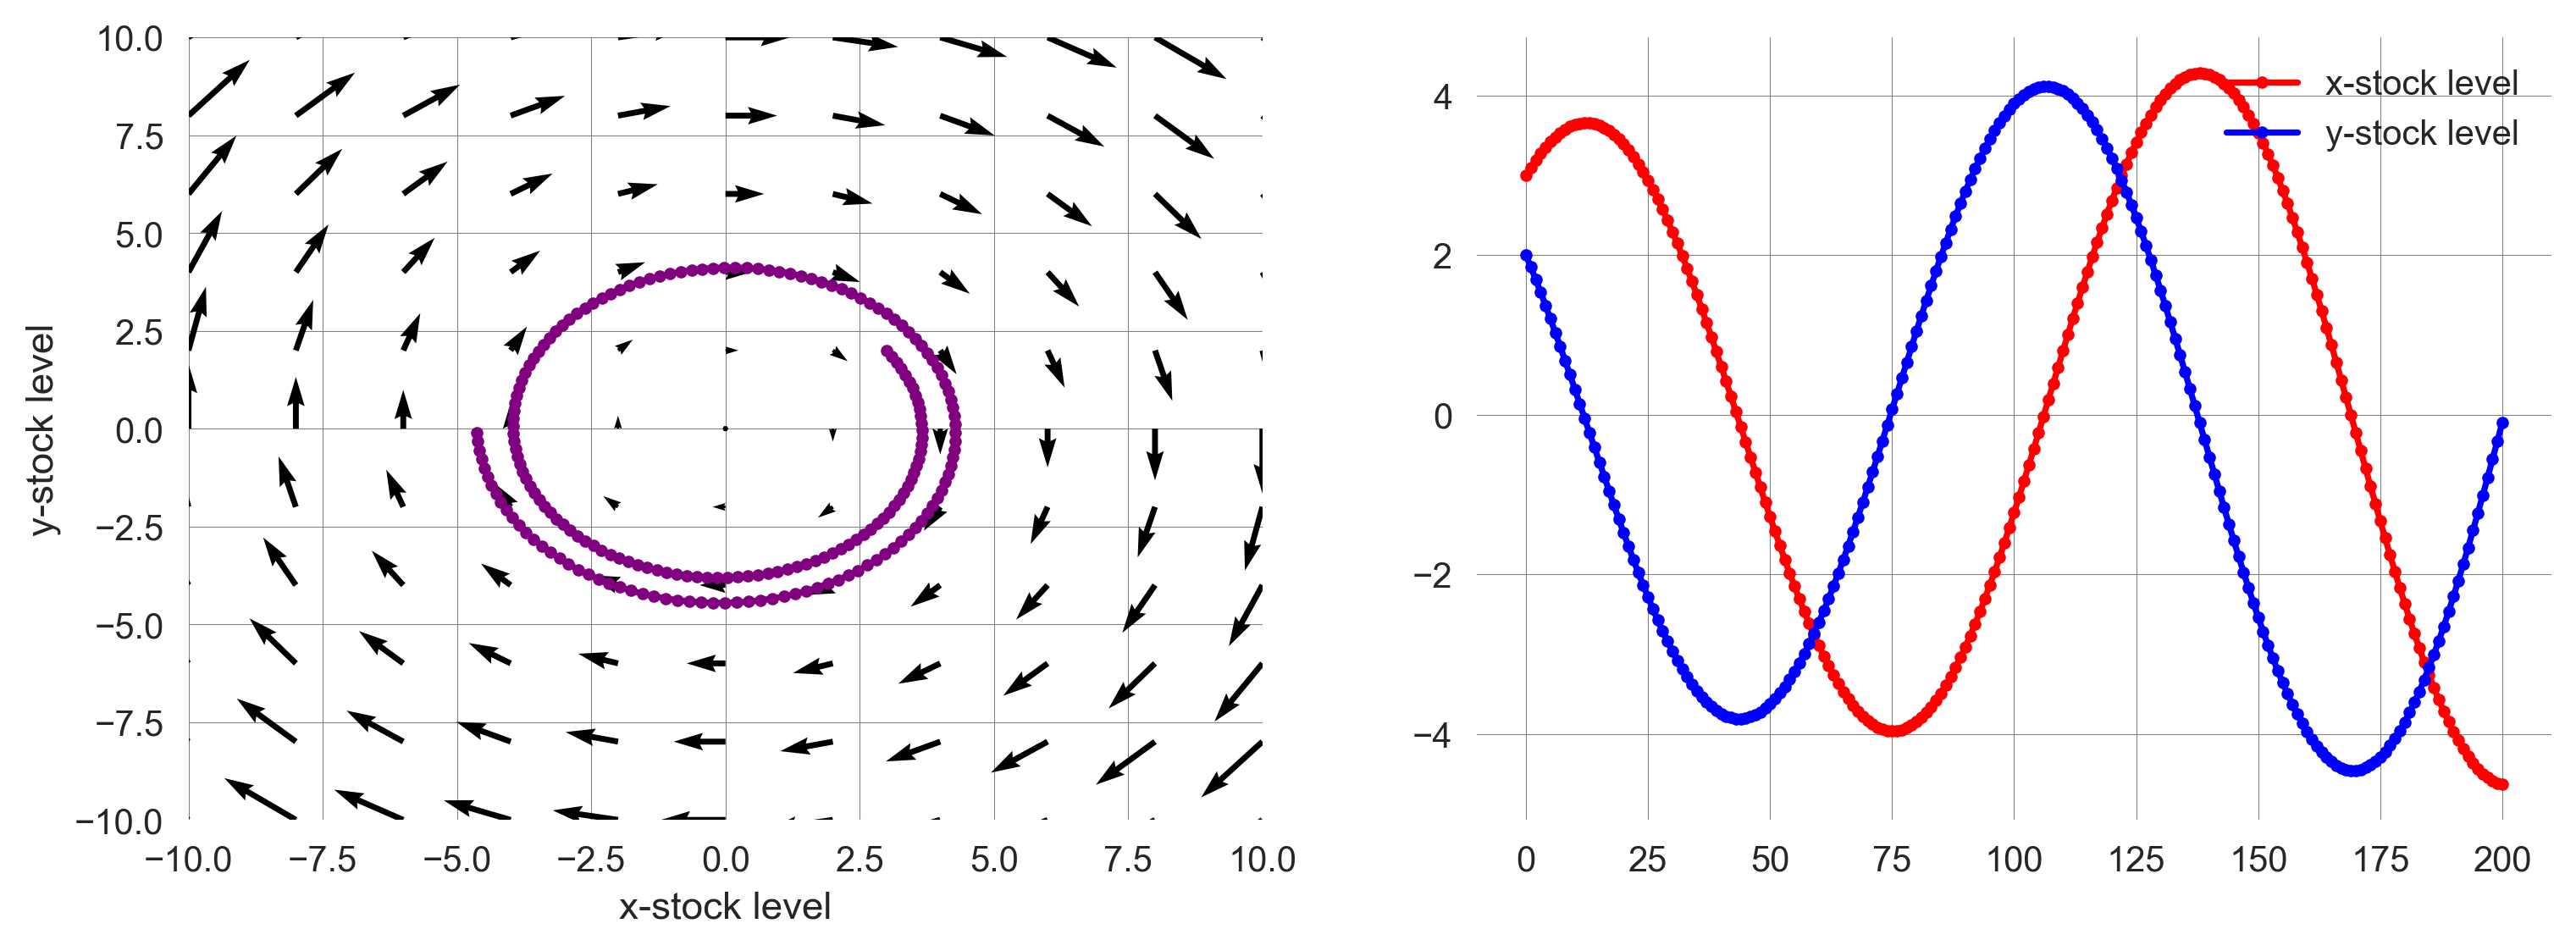

In [ ]:
#| fig-cap: Phase space flow with trajectory
#| fig-label: fig-phase-space-flow-trajectory
plot_flow_trajectory();

::: {.content-hidden unless-profile="interactive"}

We can interact with the function to see how the system behaves with different matrix values.

In [ ]:
@interact(a=(-1.2,1.2,0.01), b=(-1.2,1.2,0.01), 
          c=(-1.2,1.2,0.01), d=(-1.2,1.2,0.01), nr_timesteps=(10, 1000, 10))
def interact_with_flow(a=1,b=0.01,c=-0.01,d=1, nr_timesteps=200):
    plot_flow_trajectory(a=a, b=b, c=c, d=d, nr_timesteps=nr_timesteps)

interactive(children=(FloatSlider(value=1.0, description='a', max=1.2, min=-1.2, step=0.01), FloatSlider(value…

:::

Such a phase space visulaization is a powerful tool, connecting the time-evolution of a dynamic systems with a **geometrical representation**.

It allows us to understand the **long-term behavior** of a system, and eventually, how a system's fate **depends on its initial state**.

### Closed-form solutions of multi-dimensional systems

Similarly to one-dimensional systems with direct feedback only, a **closed-form solution** to the time evolution of multi-dimensional systems with delays, $\mathbf x_{t+1} = \mathbf A \mathbf x_{t}$, has the form,

$$ \mathbf x_{k} = \mathbf A^k \mathbf x_0$$

to calculate the system state at time $k$ and study how the system behaves when $k \rightarrow \infty$. The only problem is **how to calculate the exponential of a matrix**, $\mathbf A^t$.

To study the long-term behavior of multi-dimensional systems with delays, we turn the equation $\mathbf x_k = \mathbf A^k \mathbf x_0$ into a more manageable form. For this purpose, we utilize the **eigenvalues and eigenvectors** of matrix $\mathbf A$. To recap, eigenvalues $\lambda_i$ and eigenvectors $\mathbf v_i$ of $\mathbf A$ are the scalars and vectors satisfying,

$$ \mathbf A \mathbf v_i = \lambda_i \mathbf v_i.$$

Thus, when applying an eigenvector to its matrix effectively turns the matrix into a scalar number (the corresponding eigenvalue). Raising a scalar number to a power is easy. If we repeatedly apply this technique, we get

$$ \mathbf A^k \mathbf v_i = \mathbf A^{k-1} \lambda_i \mathbf v_i = \mathbf A^{k-2} \lambda_i^2 \mathbf v_i = \dots = \lambda_i^k \mathbf v_i.$$

**Decomposable components**. Last, we need to **represent** the **initial system state** $\mathbf x_0$ using the **eigenvectors** of matrix $\mathbf A$ as the basis vectors, i.e., 

$$\mathbf x_0 = c_1 \mathbf v_1 + c_2 \mathbf v_2 + \dots + c_n \mathbf v_n,$$

where $n$ is the dimension of the state space and the coefficients $c_1, c_2, \dots, c_n$ represent the vector $\mathbf x_0$ in the eigenvector basis of the $n \times n$ matrix $\mathbf A$.

In practice, most $n \times n$ matrices are diagonalizable[^On-diag-matrices] and thus have $n$ linearly independent eigenvectors. Therefore, we assume we can use them as the basis vectors to represent any initial state $\mathbf x_0$.
Representing $\mathbf x_0$ in the eigenbasis of $\mathbf A$ gives us

\begin{align}
\mathbf x_{k} &= \mathbf A^k \mathbf x_0 \\
 &=  \mathbf A^k (c_1 \mathbf v_1 + c_2 \mathbf v_2 + \dots + c_n \mathbf v_n) \\
 &=  c_1 \mathbf A^k \mathbf v_1 + c_2 \mathbf A^k \mathbf v_2 + \dots + c_n \mathbf A^k \mathbf v_n \\
 &=  c_1 \lambda_1^k \mathbf v_1 + c_2 \lambda_2^k \mathbf v_2 + \dots + c_n \lambda_n^k \mathbf v_n \\
\end{align}

[^On-diag-matrices]: This assumption doesn’t apply to defective (non-diagonalizable) matrices that don’t have $n$ linearly independent eigenvectors. However, such cases are rare in real-world applications because any arbitrarily small perturbations added to a defective matrix would make it diagonalizable. Problems with such sensitive, ill-behaving properties are sometimes called *pathological* in mathematical modeling.

  

Now, we can clearly see that the system's time evolution, $\mathbf x_t$, is described by a summation of multiple exponential terms of $\lambda_i$.

> Dynamics of a linear system are decomposable into multiple independent one-dimensional exponential dynamics, each of which takes place along the direction given by an eigenvector. A general trajectory from an arbitrary initial condition can be obtained by a simple linear superposition of those independent dynamics.

An eigenvalue tells us whether a particular component of a system’s state (given by its corresponding eigenvector) grows or shrinks over time. 
* When the eigenvalue is greater than 1, the component grows exponentially. 
* When the eigenvalue is less than 1, the component shrinks exponentially. 
* When the eigenvalue is equal to 1, the component is conserved.

**Dominant components and systems stability.** In the long term, the exponential term with the largest absolute eigenvalue $|\lambda_i|$ will eventually dominate the others. Suppose $\lambda_1$ has the largest absolute value ($|\lambda_1| > |\lambda_2|, \dots, |\lambda_n|$), and we factor our $\lambda_1$ from the closed-form solution for $\mathbf x_t$,

$$
\mathbf x_t =  \lambda_1^t \left(c_1  \mathbf v_1 + c_2 {\lambda_2^t \over \lambda_1^t} \mathbf v_2 + \dots + c_n {\lambda_n^t \over \lambda_1^t} \mathbf v_n \right).
$$

We can see that, eventually, the first term will dominate,

$$
\lim_{t\rightarrow \infty} \mathbf x_t \approx \lambda^t_1 c_1 \mathbf v_1.
$$

The eigenvalue with the largest absolute value is known as the **dominant eigenvalue**, while its related eigenvector is termed the **dominant eigenvector**. This eigenvector determines the asymptotic direction of the system's state. This means if a linear difference equation ($\mathbf x_{t+1} = \mathbf A \mathbf x_t$)'s coefficient matrix, $\mathbf A$, has a single dominant eigenvalue, its system state will eventually align with the direction of its corresponding eigenvector, no matter the initial state. 

* If the absolute value of the dominant eigenvalue is greater than 1, then the system will diverge to infinity, i.e., the system is unstable. 
* If less than 1, the system will eventually shrink to zero, i.e., the system is stable. 
* If it is precisely 1, then the dominant eigenvector component of the system’s state will be conserved with neither divergence nor convergence, and thus the system may converge to a non-zero equilibrium point.

**Oscillating behavior**. Where does oscillating behavior come from? 

In short, when some eigenvalues of a coefficient matrix are complex numbers. Why? The answer lies in **Euler's Formula**, which states that for any real number $x$,

$$
e^{ix} = \cos(x) + i\sin(x),
$$

bridging the world of trigonometric functions (i.e., oscillations) with exponential functions (i.e., the closed-form solutions of linear difference equations). Thus, when some eigenvalues of a coefficient matrix are complex numbers, the resulting system's behavior is rotations around the origin of the system's phase space.

The meaning of the absolute values of those complex eigenvalues is still the same as before: 

* if the eigenvalue's absolute value is **larger than one**, $|\lambda| > 1$, we have **instability** in the form of rotations with an expanding amplitude;
* if the eigenvalue's absolute value is **smaller than one**, $|\lambda| < 1$, we have **stability** in the form of rotations with a shrinking amplitude; 
and 
* if the eigenvalue's absolute value **equals one**, $|\lambda| = 1$, we have **conservation** in the form of rotations with a sustained amplitude. 

**Eigenvalue spectrum**. 

For higher-dimensional systems, various kinds of eigenvalues can appear in a mixed way; some of them may show exponential growth, some may show exponential decay, and some others may show rotation. This means that all of those behaviors are going on simultaneously and independently in the system. A **list of all the eigenvalues** is called the eigenvalue spectrum of the system (or just spectrum for short). The eigenvalue spectrum carries a lot of valuable information about the system’s behavior, but often, the most important information is whether the system is stable or not, which can be obtained from the dominant eigenvalue.

How to put this into practice/Python?

We use `scipy.linalg.eig` to calculate the eigenvalues and eigenvectors of a matrix.

From the documentation (`scipy.linalg.eig?`) we note that it return two objects, an iterable of eigenvalues `w` and an iterable of eigenvalues `v`. The normalized eigenvector corresponding to the eigenvalue ``w[i]`` is the column ``v[:,i]``.

In [ ]:
evals, evecs = scipy.linalg.eig(A)

For example, the eigenvalues are

In [ ]:
evals

array([1.3327763 +0.j, 2.67216924+0.j])

The eigenvectors are


In [ ]:
evecs

array([[-0.68016499, -0.40323309],
       [ 0.73305906, -0.9150973 ]])

For readbility, we store eigenvalues and eigenvectors in new variables.

In [ ]:
eval1, eval2 = evals
print(eval1)
print(eval2)

(1.3327763045702077+0j)
(2.672169240598914+0j)


Since the eigenvectors are return in the format in which they are return we need to transpose them to assign them to two separate variables.

In [ ]:
evec1, evec2 = evecs.T
# We check that we did not make any mistake:
print("This should be zeros:", evec1 - evecs[:,0])
print("This too:", evec2 - evecs[:,1])

This should be zeros: [0. 0.]
This too: [0. 0.]


We can autmate such checks with the `assert` statement.

In [ ]:
assert np.allclose(evec1, evecs[:,0]), "The first eigenvector is not correct"
assert np.allclose(evec2, evecs[:,1]), "The second eigenvector is not correct"  

Now, we create a `plot_eigenvectors` function.

In [ ]:
def plot_eigenvectors(a,b,c,d, extent=10, ax=None):
        if ax is None: _, ax = plt.subplots(1,1, figsize=(6,3))

        A = np.array([[a, b], [c, d]])
        evals, evecs = scipy.linalg.eig(A)
        eval1, eval2 = evals
        evec1, evec2 = evecs.T

        # plotting the real part of the eigenvectors
        ax.plot([0, extent*evec1[0].real], [0, extent*evec1[1].real], '-', 
                lw=2, color='deepskyblue', 
                label=r'$|\lambda_1|$ = {}'.format(np.abs(eval1).round(4)))
        ax.plot([0, extent*evec2[0].real], [0, extent*evec2[1].real], '-', 
                lw=2, color='teal', 
                label=r'$|\lambda_2|$ = {}'.format(np.abs(eval2).round(4)))

        ax.legend(loc='upper right', bbox_to_anchor=(-0.15, 1))
    

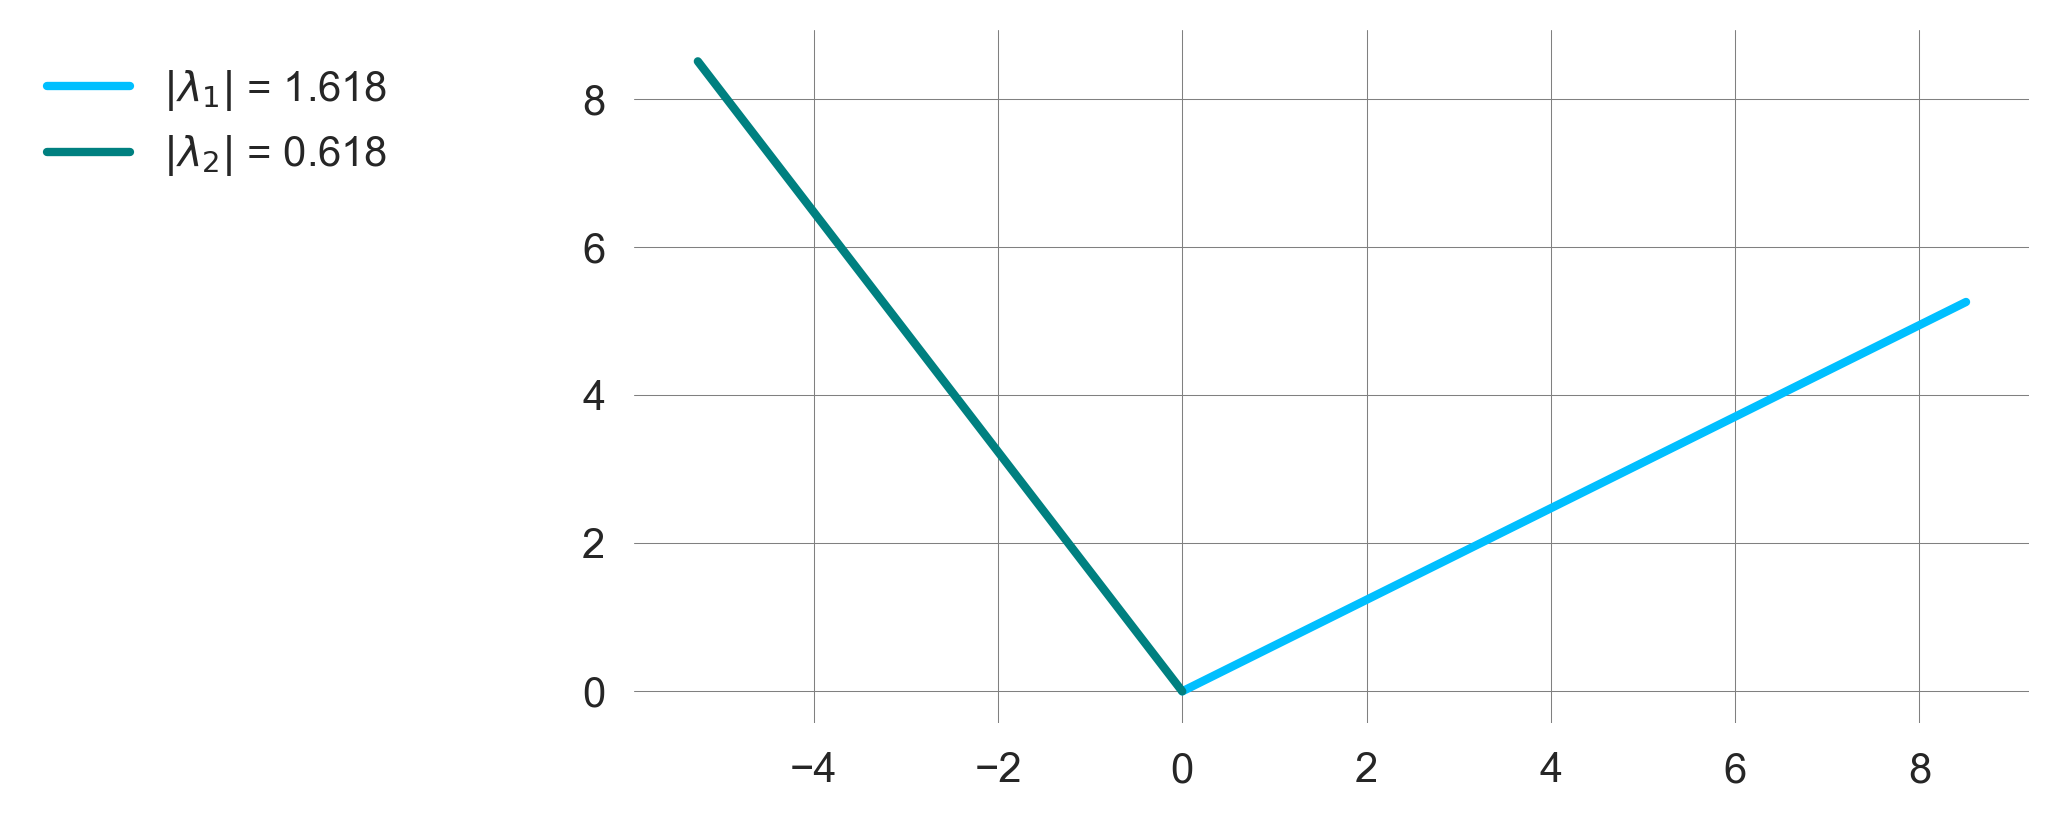

In [ ]:
#| fig-cap: Eigenvectors of a system
#| fig-label: fig-eigenvectors-of-a-dynamic-system
plot_eigenvectors(a=1, b=1, c=1.0, d=0)

Putting it all together, we observe how the eigenvector represents the long-term behavior of the system (@fig-eigenvector-flow).

In [ ]:
def plot_flow_trajectory_with_ev(a=1,b=0.15,c=0.6, d=1, nr_timesteps=20, 
                                 x0=-4, y0=8.5, extent=6):
    fix, ax = plt.subplots(1,2, figsize=(12, 4));  # axes and limits
    
    A = np.array([[a, b], [c, d]])
    ts = iterate_model(nr_timesteps, [x0, y0], update_general_model, A=A)
    plot_flow(A, ax=ax[0], extent=extent)
    plot_eigenvectors(a,b,c,d, ax=ax[0], extent=0.9*extent)

    ax[0].plot(ts[:,0], ts[:,1], '.-', label='Model trajectory', color='purple')
    ax[0].set_xlim(-extent, extent); ax[0].set_ylim(-extent, extent);    
    ax[1].plot(ts[:,0], '.-', label='x-stock level', color='red')
    ax[1].plot(ts[:,1], '.-', label='y-stock level', color='blue')
    ax[1].legend()

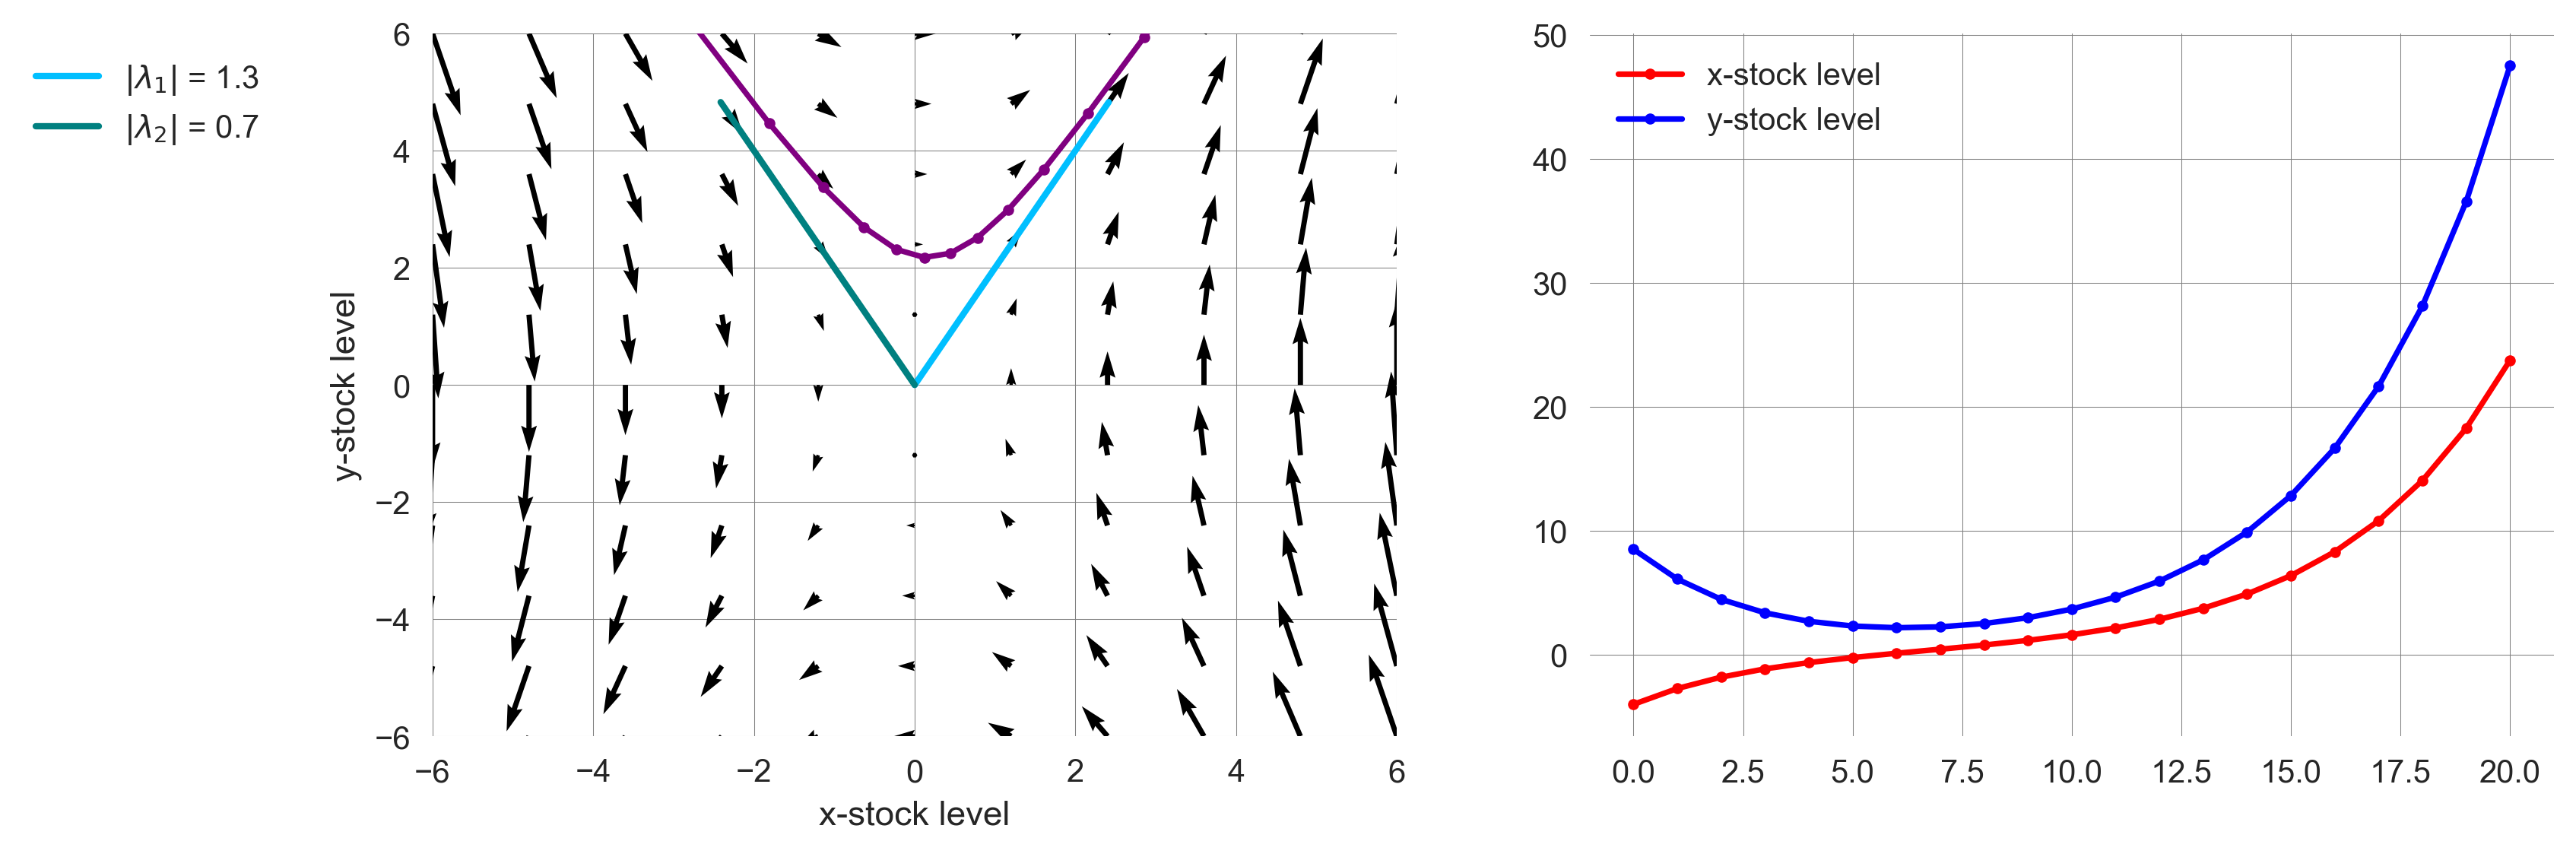

In [ ]:
#| label: fig-eigenvector-flow
#| fig-cap: Phase space flow with trajectory and eigenvectors.
plot_flow_trajectory_with_ev()

::: {.content-hidden unless-profile="interactive"}

In [ ]:
interact(plot_flow_trajectory_with_ev, a=(-1.2,1.2,0.01), b=(-1.2,1.2,0.01), c=(-1.2,1.2,0.01), d=(-1.2,1.2,0.01), 
         nr_timesteps=(10, 1000, 10), x0=(-10, 10, 0.5), y0=(-10, 10, 0.5), extent=(1, 100, 1));

interactive(children=(FloatSlider(value=1.0, description='a', max=1.2, min=-1.2, step=0.01), FloatSlider(value…

:::

### Summary | Systems with linear changes

| ${}$ | $k$ th-component is ... | if $\lambda_k$ is complex-conjugate,<br> the $k$th-component is rotating around the origin | if $\lambda_k$ is dominant |
|:---:|:---:|:---:|:---:|
| $\| \lambda_k \| > 1$ | growing | with an expanding amplitude. | system unstable, diverging to infinity |
| $\| \lambda_k \| < 1$ | shrinking | with a shrinking amplitude. | system stable, converging to the origin. |
| $\| \lambda_k \| = 1$ | conserved | with a sustained amplitude. | system stable, dominant eigenvector component conserved,<br>system may converge to a non-zero equilibrium point |

> Linear dynamical systems can show only exponaential growth/decay, periodic oscillation, stationary states (no change), or their
hybrids (e.g., exponentially growing oscillation) .

Sometimes they can also show behaviors that are represented by polynomials (or products of polynomials and exponentials)
of time. This occurs when their coefficient matrices are non-diagonalizable. [@Sayama2023]

In other words, these behaviors are signatures of linear systems. If you observe such behavior in nature, you may be able to assume
that the underlying rules that produced the behavior could be linear.

## Non-linear changes


Systems with non-linear changes, often called just non-linear systems, are
defined as systems who are not linear ($\mathbf x_{t+1}=\mathbf A \mathbf x_t$). In other words, they are systems whose rules involve non-linear combinations of state variables.

While **linear systems exhibit relatively simple behavior** (exponential growth/decay, periodic oscillation, stationary states (no change), or their hybrids (e.g., exponentially growing oscillation)), **non-linear systems can exhibit a much wider range of behaviors**, including chaotic dynamics, bifurcations, and limit cycles. As a result, there is no general way to obtain a closed-form solution for non-linear systems, making them much more challenging to analyze and predict than linear systems.

The **logisitc map** is a classic example of a one-dimensional nonlinear system. It is defined as

$$x_{t+1} = x_t + rx_{t}(1 - \frac{x_{t}}{C}),$$

where $r$ is the growth rate and $C$ the carrying capacity. In Python, it can be implemented as follows:

In [ ]:
def logistic_map(x, r, C=1): return x + r*x*(1-x/C)

Plotting the logistic map for a growth rate of 0.25, and a carrying capacity of 3.0, results in the following time evolution:

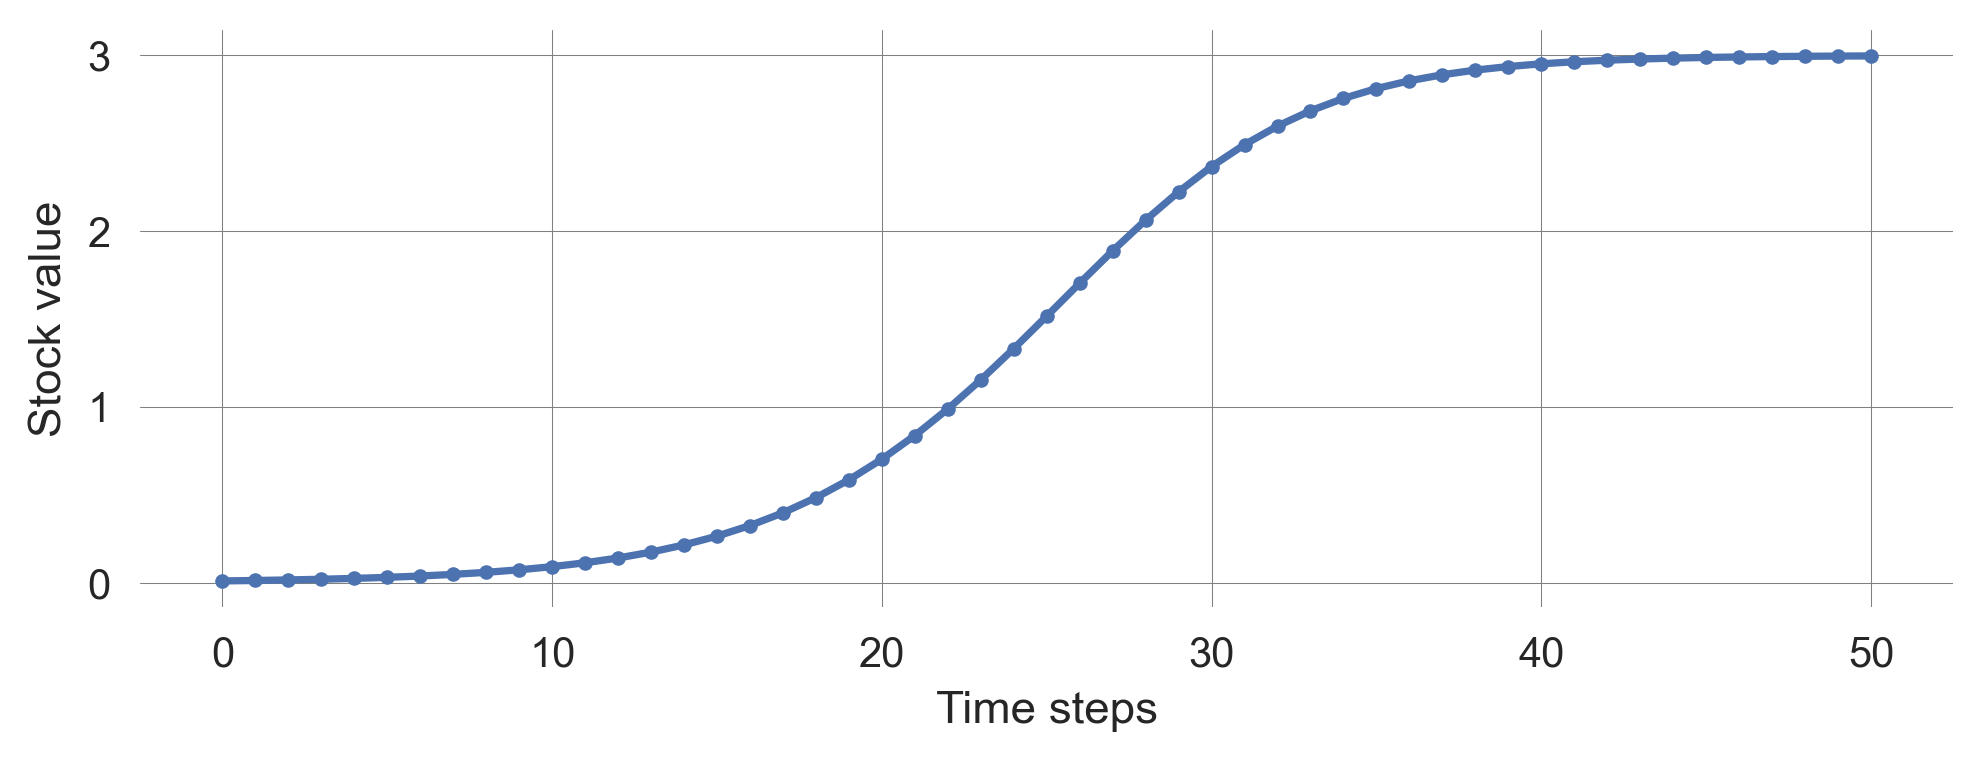

In [ ]:
#| fig-cap: Time evolution of the logistic map
#| fig-label: fig-time-evolution-logistic-map
plot_stock_evolution(50, 0.01, update_func=logistic_map, r=0.25, C=3.0);

### Finding equilibrium points

An *equilibirum* point $x_e$ (also called fixed points or steady states) is a point in the state space, where the system can stay unchanged over time.

$$x_e = F(x_e)$$

In other words, if the system state is at an equilibrium point, it will remain there indefinitely. Fixed points are **theoretically important** as a meaningful reference when we understand the structure of the phase space. They are of **practical relevance** when we want to sustain the system at a certain desirable state.

To find the equilibrium points of a system, we need to solve the equation $x_e = F(x_e)$ for $x_e$. This can be done by setting $x_{t+1} = x_t = x_e$ in the system's update function and solving for $x_e$.

**For example**, in the logistic map, we obtain,

\begin{align}
x_e &= x_{e} + rx_{e}(1 - \frac{x_{e}}{C}) \\
0 &= 0+ rx_{e}(1 - \frac{x_{e}}{C}) \\
0 &= rx_{e}(1 - \frac{x_{e}}{C})
\end{align}

This equation is fulfilled if either $x_e = 0$ or $x_e = C$. Thus, the logistic map has two equilibrium points, $x_e = 0$ and $x_e = C$.

Graphically, fixpoints of an iterative map are the intersections between $F(x)$ and $x$.

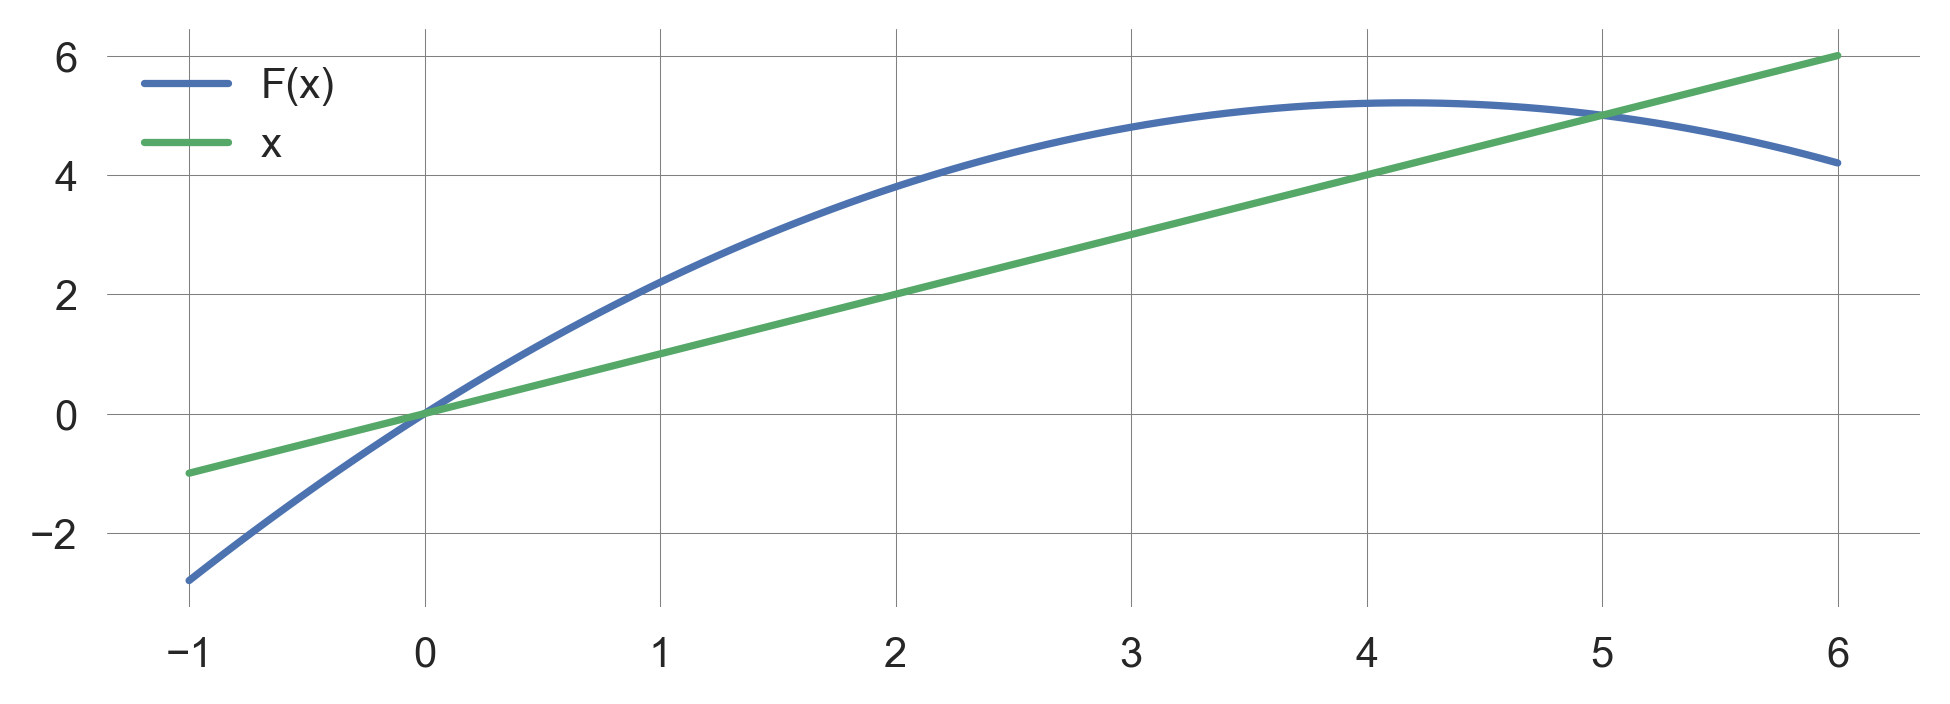

In [ ]:
#| fig-cap: $F(x)$ and $x$ for the logistic map
#| fig-label: fig-Fx-x-logistic-map
xs = np.linspace(-1, 6, 101)  # Resolution of the x axis
plt.plot(xs, logistic_map(xs, 1.5, 5), label="F(x)")  # Plot the map x_=F(x)
plt.plot(xs, xs, label="x")  # Plot the diagonal x_=x
plt.legend();  # Include the legend

We can enrich this representation with the cobweb plot, which shows the system's time evolution from an initial state to the equilibrium point.

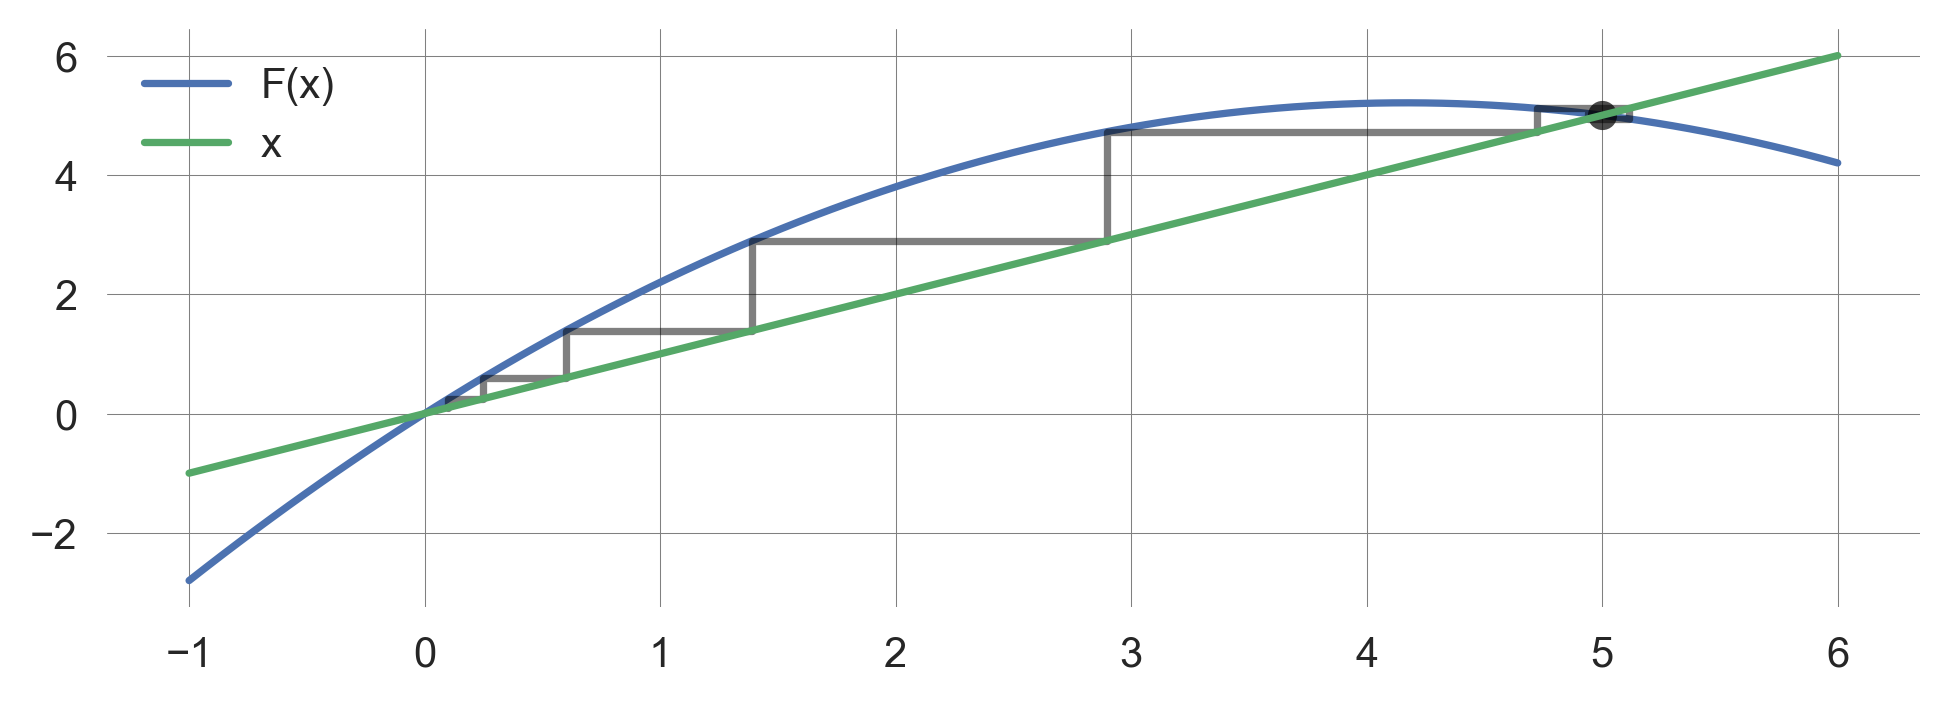

In [ ]:
#| fig-cap: Cobweb plot of the logistic map
#| fig-label: fig-logistic-map-cobweb
xs = np.linspace(-1, 6, 101)
plt.plot(xs, logistic_map(xs, 1.5, 5), label="F(x)")
h,v = cobweb(logistic_map, initial_value=0.1, r=1.5, C=5,
             nr_timesteps=100, ax=plt.gca()); 
plt.plot(xs, xs, label="x")
plt.legend();

### Linear stability in nonlinear systems

Unfortunately, it is impossible to forcast the asymptotic behaviors of nonlinear systems in the same way as for linerar systems.

However, the concept of stability in linear systems can be applied to equilibirum points of non-linear systems. 
> The basic idea of linear stability analysis is to rewrite the dynamics of the system in terms of a small perturbation added to the equilibrium point of your interest. 



Consider the system $x_{t+1} = F(x_{t})$ with steady state $x_e$.

To analyze its stability around this equilibrium point, we switch our perspective from a global coordinate system to a local one.
We zoom in and capture a small perturbation added to the equilibrium point, $z_t = x_t - x_e$.
Inserting $x_t$ into the update equation, yields
  $$ x_e + z_t = F(x_e+z_{t-1}).$$

Since $z$ is small (by assumption), we can approximate the right-hand side as a Taylor expansion,
  $$ x_e + z_t = F(x_e) + F'(x_e)z_{t-1} + O(z_{t-1}^2)  $$
  where, $F'$ is the derivative of $F$ with respect to $x$.

Using $x_e=F(x_e)$, we obtain the simple linear difference equation,
$$z_t \approx F'(x_e) z_{t-1}.$$

> To determine the stability of fixed points in non-linear systems, we need to look at the derivative of $F(x_e)$ at the fixed point.


There are **three qualitatively distinct cases** for the linear stability of a steady state in a non-linear system.

1) $|F'(x_e)|<1$: The equilibirum point $x_e$ is stable.
2) $|F'(x_e)|>1$: The equilibirum point $x_e$ is unstable.
3) $|F'(x_e)|=1$: The equilibirum point $x_e$ is neutral [^neutral] 

[^neutral]: also known as *Lyapunov* stable. More advanced nonlinear analysis is required to show that an equilibrium point is truly neutral.


**For example**, for the logistic map,

$$x_{t+1} = F(x_t) = x_{t} + rx_{t}(1 - \frac{x_{t}}{C})$$

In [ ]:
def F(x, a, K): return x + a*x*(1-x/K)

we calculate the derivative of $F(x_t)$ as

$$F'(x) = 1+  r - 2r\frac{x}{C}.$$

At the fixed points $x_e = 0$ and $x_e = C$, we have 

$$F'(x)|_{x=0} = 1+r,  \quad  \text{and} \quad  F'(x)|_{x=C} = 1-r.$$


In [ ]:
def plot(r=1.25, C=5):
    xs = np.linspace(-1, 6, 101);
    plt.plot(xs, logistic_map(xs, r, C), label="F(x)")  # plot F(x)
    plt.plot(xs, xs, label="x")  # plot x
    # Derivatives
    zs=np.linspace(-0.5, 0.5, 101); plt.plot(zs, (1+r)*(zs), c='red')
    zs=np.linspace(C-0.5, C+0.5, 101); plt.plot(zs, r*C+(1-r)*(zs), c='red')    
    h,v = cobweb(logistic_map, initial_value=1.0, r=r, C=C,
                 nr_timesteps=100, ax=plt.gca()); 
    plt.legend();

Graphically, we obtain @fig-logistic-map-stability.

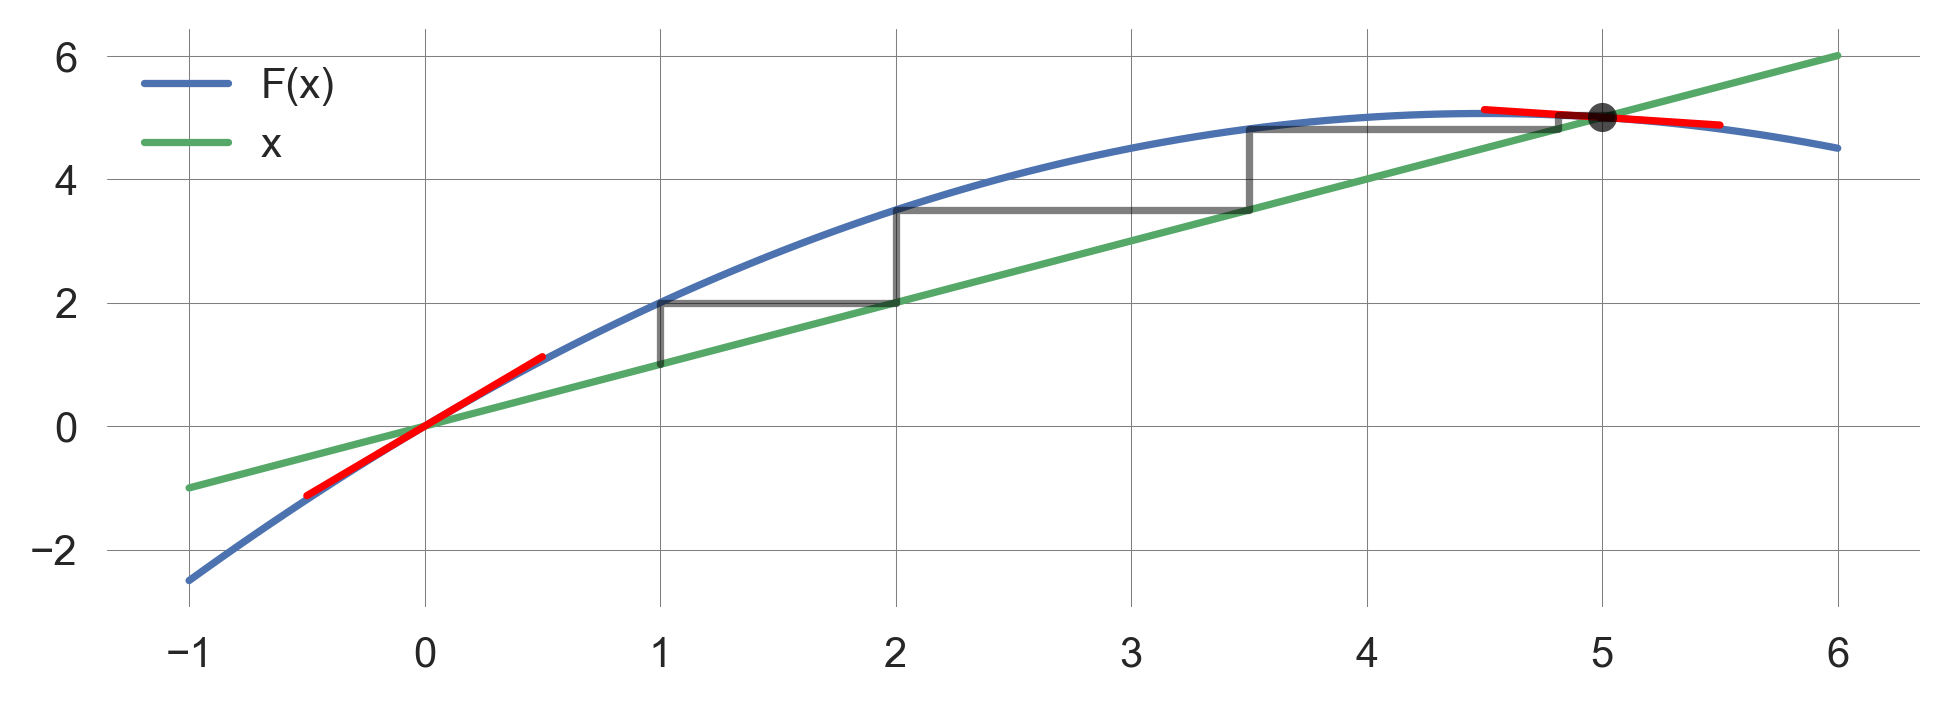

In [ ]:
#| fig-cap: Linear stability shown at the nonlinear logistic map.
#| label: fig-logistic-map-stability
plot()

::: {.content-hidden unless-profile="interactive"}

In [ ]:
interact(plot, r=(0,3,0.05), C=(0,7,0.1));    

interactive(children=(FloatSlider(value=1.25, description='r', max=3.0, step=0.05), FloatSlider(value=5.0, des…

:::

We **observe**, that when $0<r<2$, the system convergens to $x_e=C$. When $r>2$, $F'(x)|_{x=C} = 1 - r < -1$ causing unstable ossilations.

## Learning goals revisited


* Define and describe the **components of a dynamic system**.
    * At their core, dynamic systems consist of stocks and flows.
* **Represent** dynamic system models in visual and mathematical form.
    * In general, a dynamic system iterates via $\mathbf x_{t+1} = F(\mathbf x_t)$.
* Explain the concepts of **feedback loops**  and **delays**.
    * Reinforcing (positive) feedback loops lead to divergence/instability.
    * Balancing (negative) feedback loops lead to convergence/stability.
    * Considering delays makes system more complicated.
* Explain two kinds of **non-linearity** and how they are related.
    * Dynamic systems with linear changes can be represented as $\mathbf x_{t+1} = \mathbf A \mathbf x_t,$ and can exhibit non-linear behavior, such as exponential growth or decay, periodic osscilations, or stationary states, or their combinations.
    * Dynamic systems with non-linear changes can exhibit more kinds of behaviors.
* **Implement** dynamic system models and **visualize model outputs** using Python, to interpret model results.
* **Analyze** the **stability** of equilibrium points in dynamic systems using linear stability analysis.


In the [exercises for this lecture](https://wbarfuss.github.io/csm-of-hei/02.01ex-Nonlinearity.html), you will investigate the questions when feedback and overshoot lead to prolonged oscillations and when they do not.

### Bibliographical and Historical Remarks

@Raworth2017 (Chapter 4) and @Page2018 (Chapter 18) provide great conceptual introductions to the topic without going into mathematical details.

@Sayama2023 heavily inspired some of the material in this lecture.


::: {.content-hidden unless-profile="standalone"}

## References

:::

::: {.content-hidden unless-profile="housekeeping"}

## Housekeeping

With the following cells, we can convert this notebook into slides and a PDF handout. If you work with this notebook interactively, you can ignore them.

To obtain static HTML slides, execute the following cell:

In [ ]:
!jupyter nbconvert 02.01-Nonlinearity.ipynb --to slides --embed-images --TagRemovePreprocessor.enabled=True \
    --TagRemovePreprocessor.remove_cell_tags hide_cell \
    --TagRemovePreprocessor.remove_input_tags hide_input \
    --TagRemovePreprocessor.remove_all_outputs_tags remove_outputs \
    --output-dir "./__slides"

[NbConvertApp] Converting notebook 02.01-Nonlinearity.ipynb to slides
[NbConvertApp] WARNING | Alternative text is missing on 18 image(s).
[NbConvertApp] Writing 19719844 bytes to __slides/02.01-Nonlinearity.slides.html


For a standalone PDF handout, we make the cell below a Python cell and execute it.

---
metadata-files: [_standalone-quarto.yml]
---

#| output: false 
!cp 02.01-Nonlinearity.ipynb 02.01-Nonlinearity_.ipynb
!quarto render 02.01-Nonlinearity_.ipynb --to pdf --profile standalone
!mv 02.01-Nonlinearity_.pdf __scripts/02.01-Nonlinearity.pdf
!rm -r 02.01-Nonlinearity_*

:::